   ## DETECCION DEL ESTADO DE MADUREZ DEL MANGO DE HILACHA USANDO         REDES NEURONALES CONVOLUCIONALES 
   
##    ELKIN RAMIREZ GONZALEZ
##    JADER PEÑALOZA MONROY
                                            
###  INTELIGENCIA ARTIGICIAL
                                                    

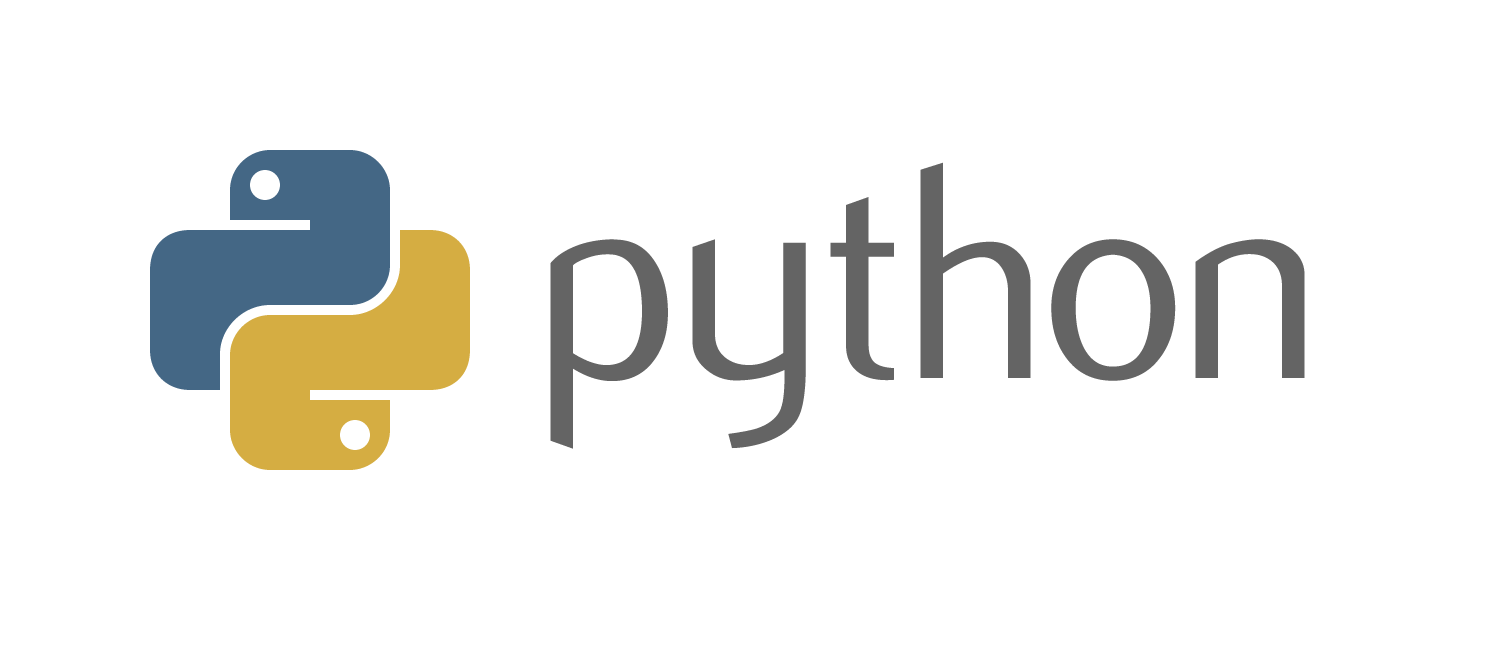

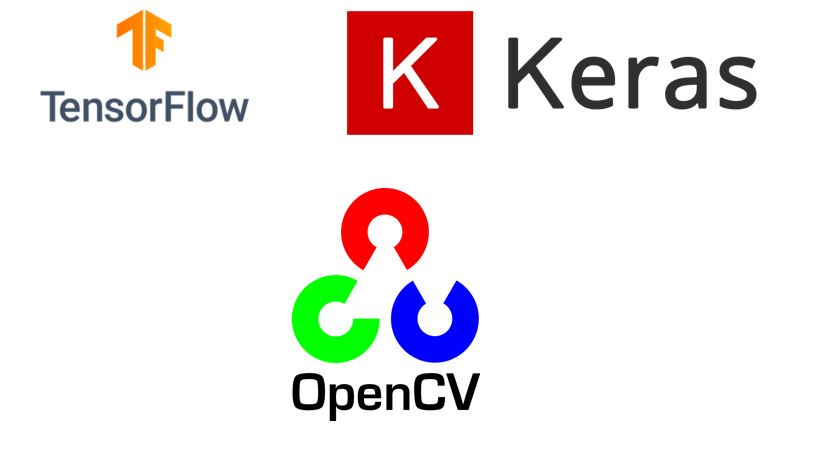

In [11]:
# scipy   # matematica
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy # algebra lineal y componente matematica (matrices, arrreglos)
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib #graficas
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas #manejo de datos
print('pandas: %s' % pandas.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

scipy: 1.5.2
numpy: 1.19.2
matplotlib: 3.3.2
pandas: 1.1.3
statsmodels: 0.12.0
sklearn: 0.23.2


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
import seaborn as sb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from seaborn import lmplot
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score 
import scipy.misc
import statistics
from IPython.display import Image
from PIL import Image

In [6]:
import argparse
import os
import numpy as np
import json
import cv2
import copy
import imgaug as ia
from imgaug import augmenters as iaa
import xml.etree.ElementTree as ET
from keras.utils import Sequence

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow.contrib'

In [5]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip show opencv-python

In [12]:
pip install keras==2.0.8

  Using cached Keras-2.0.8-py2.py3-none-any.whl (276 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)

  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Using cached grpcio-1.32.0-cp38-cp38-win_amd64.whl (2.6 MB)


  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
Processing c:\users\elkin\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501\termcolor-1.1.0-py3-none-any.whl
  Using cached protobuf-3.14.0-py2.py3-none-any.whl (173 kB)
  Using cached tensorboard-2.4.0-py3-none-any.whl (10.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Markdown-3.3.3-py3-none-any.whl (96 kB)
  Using cached google_auth-1.24.0-py2.py3-none-any.whl (114 kB)
  Using cached tensorboard_plugin_wit-1.7.0-py3-none-any.whl (779 kB)
  Using cached google_auth_oauthlib-0.4.2-py2.py3-none-any.whl (18 kB)
  Using cached cachetools-4.2.0-py3-none-any.whl (12 kB)
  Using cached rsa-4.6-py3-none-any.whl (47 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using 

In [15]:
pip show tensorflow

Name: tensorflow
Version: 2.4.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\elkin\anaconda3\lib\site-packages
Requires: protobuf, termcolor, tensorflow-estimator, absl-py, wrapt, astunparse, h5py, keras-preprocessing, opt-einsum, six, gast, numpy, flatbuffers, wheel, tensorboard, grpcio, google-pasta, typing-extensions
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install tqdm

In [10]:
pip install imgaug==0.2.5

Processing c:\users\elkin\appdata\local\pip\cache\wheels\6d\6d\83\f4e35acdf97353c35b08f21f198b208916f2b6517bd98476d9\imgaug-0.2.5-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install cvlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

  Using cached pip-20.3.3-py2.py3-none-any.whl (1.5 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:
      Successfully uninstalled pip-20.2.4
Note: you may need to restart the kernel to use updated packages.


## RECOPILACIÓN DE IMAGENES INICIALES

Para construir el conjunto de imagen fue mediante un código, mediante la cámara del portátil se hizo un recuadro donde se identifica y se guarda el objetivo a detectar como se muestra en la siguiente imagen:

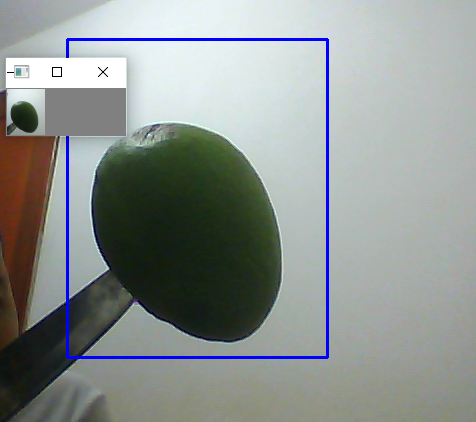

Para recopilar las imágenes se realizar el entrenamiento será necesario contar con una serie de etiquetas, en este caso seran dos: en la primera es para localizar los mangos que estan en buen estado, lo cual cuenta con 3.000 imágenes y la segunda etiqueta es para localizar los mangos de hilacha que estan en mal estado lo cual cuenta con 3.000  imágenes. Estas imágenes no deben ser muy grandes, ya que esto podría provocar lentitud en la detección, Hay que tomar en cuenta, además, que, para obtener mejores resultados de detección, las imágenes de entrenamiento deben tener la mayor variedad posible, tomando en cuenta el ambiente en donde va a trabajar.

In [ ]:

import cv2
import numpy as np
import imutils
import os

Datos = 'mango'
if not os.path.exists(Datos):
    print('Carpeta creada: ',Datos)
    os.makedirs(Datos)

cap = cv2.VideoCapture(0,cv2.CAP_DSHOW)

x1, y1 = 190, 80
x2, y2 = 450, 398

count = 0
while True:

    ret, frame = cap.read()
    if ret == False: break
    imAux = frame.copy()
    cv2.rectangle(frame,(x1,y1),(x2,y2),(255,0,0),2)

    objeto = imAux[y1:y2,x1:x2]
    objeto = imutils.resize(objeto,width=38)
   

    k = cv2.waitKey(1)
    if k == ord('s'):
        cv2.imwrite(Datos+'/obbjeto_{}.jpg'.format(count),objeto)
        print('Imagen guardada:'+'/obbjeto_{}.jpg'.format(count))
        count = count +1
    if k == 27:
        break

    cv2.imshow('camara',frame)
    cv2.imshow('objeto',objeto)

cap.release()
cv2.destroyAllWindows()

Imagen guardada:/obbjeto_0.jpg
Imagen guardada:/obbjeto_1.jpg
Imagen guardada:/obbjeto_2.jpg
Imagen guardada:/obbjeto_3.jpg
Imagen guardada:/obbjeto_4.jpg
Imagen guardada:/obbjeto_5.jpg
Imagen guardada:/obbjeto_6.jpg
Imagen guardada:/obbjeto_7.jpg
Imagen guardada:/obbjeto_8.jpg
Imagen guardada:/obbjeto_9.jpg
Imagen guardada:/obbjeto_10.jpg
Imagen guardada:/obbjeto_11.jpg
Imagen guardada:/obbjeto_12.jpg
Imagen guardada:/obbjeto_13.jpg
Imagen guardada:/obbjeto_14.jpg
Imagen guardada:/obbjeto_15.jpg
Imagen guardada:/obbjeto_16.jpg
Imagen guardada:/obbjeto_17.jpg
Imagen guardada:/obbjeto_18.jpg
Imagen guardada:/obbjeto_19.jpg
Imagen guardada:/obbjeto_20.jpg
Imagen guardada:/obbjeto_21.jpg
Imagen guardada:/obbjeto_22.jpg
Imagen guardada:/obbjeto_23.jpg
Imagen guardada:/obbjeto_24.jpg
Imagen guardada:/obbjeto_25.jpg
Imagen guardada:/obbjeto_26.jpg
Imagen guardada:/obbjeto_27.jpg
Imagen guardada:/obbjeto_28.jpg
Imagen guardada:/obbjeto_29.jpg
Imagen guardada:/obbjeto_30.jpg
Imagen guardada:/o

Imagen guardada:/obbjeto_255.jpg
Imagen guardada:/obbjeto_256.jpg
Imagen guardada:/obbjeto_257.jpg
Imagen guardada:/obbjeto_258.jpg
Imagen guardada:/obbjeto_259.jpg
Imagen guardada:/obbjeto_260.jpg
Imagen guardada:/obbjeto_261.jpg
Imagen guardada:/obbjeto_262.jpg
Imagen guardada:/obbjeto_263.jpg
Imagen guardada:/obbjeto_264.jpg
Imagen guardada:/obbjeto_265.jpg
Imagen guardada:/obbjeto_266.jpg
Imagen guardada:/obbjeto_267.jpg
Imagen guardada:/obbjeto_268.jpg
Imagen guardada:/obbjeto_269.jpg
Imagen guardada:/obbjeto_270.jpg
Imagen guardada:/obbjeto_271.jpg
Imagen guardada:/obbjeto_272.jpg
Imagen guardada:/obbjeto_273.jpg
Imagen guardada:/obbjeto_274.jpg
Imagen guardada:/obbjeto_275.jpg
Imagen guardada:/obbjeto_276.jpg
Imagen guardada:/obbjeto_277.jpg
Imagen guardada:/obbjeto_278.jpg
Imagen guardada:/obbjeto_279.jpg
Imagen guardada:/obbjeto_280.jpg
Imagen guardada:/obbjeto_281.jpg
Imagen guardada:/obbjeto_282.jpg
Imagen guardada:/obbjeto_283.jpg
Imagen guardada:/obbjeto_284.jpg
Imagen gua

Imagen guardada:/obbjeto_507.jpg
Imagen guardada:/obbjeto_508.jpg
Imagen guardada:/obbjeto_509.jpg
Imagen guardada:/obbjeto_510.jpg
Imagen guardada:/obbjeto_511.jpg
Imagen guardada:/obbjeto_512.jpg
Imagen guardada:/obbjeto_513.jpg
Imagen guardada:/obbjeto_514.jpg
Imagen guardada:/obbjeto_515.jpg
Imagen guardada:/obbjeto_516.jpg
Imagen guardada:/obbjeto_517.jpg
Imagen guardada:/obbjeto_518.jpg
Imagen guardada:/obbjeto_519.jpg
Imagen guardada:/obbjeto_520.jpg
Imagen guardada:/obbjeto_521.jpg
Imagen guardada:/obbjeto_522.jpg
Imagen guardada:/obbjeto_523.jpg
Imagen guardada:/obbjeto_524.jpg
Imagen guardada:/obbjeto_525.jpg
Imagen guardada:/obbjeto_526.jpg
Imagen guardada:/obbjeto_527.jpg
Imagen guardada:/obbjeto_528.jpg
Imagen guardada:/obbjeto_529.jpg
Imagen guardada:/obbjeto_530.jpg
Imagen guardada:/obbjeto_531.jpg
Imagen guardada:/obbjeto_532.jpg
Imagen guardada:/obbjeto_533.jpg
Imagen guardada:/obbjeto_534.jpg
Imagen guardada:/obbjeto_535.jpg
Imagen guardada:/obbjeto_536.jpg
Imagen gua

Imagen guardada:/obbjeto_757.jpg
Imagen guardada:/obbjeto_758.jpg
Imagen guardada:/obbjeto_759.jpg
Imagen guardada:/obbjeto_760.jpg
Imagen guardada:/obbjeto_761.jpg
Imagen guardada:/obbjeto_762.jpg
Imagen guardada:/obbjeto_763.jpg
Imagen guardada:/obbjeto_764.jpg
Imagen guardada:/obbjeto_765.jpg
Imagen guardada:/obbjeto_766.jpg
Imagen guardada:/obbjeto_767.jpg
Imagen guardada:/obbjeto_768.jpg
Imagen guardada:/obbjeto_769.jpg
Imagen guardada:/obbjeto_770.jpg
Imagen guardada:/obbjeto_771.jpg
Imagen guardada:/obbjeto_772.jpg
Imagen guardada:/obbjeto_773.jpg
Imagen guardada:/obbjeto_774.jpg
Imagen guardada:/obbjeto_775.jpg
Imagen guardada:/obbjeto_776.jpg
Imagen guardada:/obbjeto_777.jpg
Imagen guardada:/obbjeto_778.jpg
Imagen guardada:/obbjeto_779.jpg
Imagen guardada:/obbjeto_780.jpg
Imagen guardada:/obbjeto_781.jpg
Imagen guardada:/obbjeto_782.jpg
Imagen guardada:/obbjeto_783.jpg
Imagen guardada:/obbjeto_784.jpg
Imagen guardada:/obbjeto_785.jpg
Imagen guardada:/obbjeto_786.jpg
Imagen gua

Imagen guardada:/obbjeto_1009.jpg
Imagen guardada:/obbjeto_1010.jpg
Imagen guardada:/obbjeto_1011.jpg
Imagen guardada:/obbjeto_1012.jpg
Imagen guardada:/obbjeto_1013.jpg
Imagen guardada:/obbjeto_1014.jpg
Imagen guardada:/obbjeto_1015.jpg
Imagen guardada:/obbjeto_1016.jpg
Imagen guardada:/obbjeto_1017.jpg
Imagen guardada:/obbjeto_1018.jpg
Imagen guardada:/obbjeto_1019.jpg
Imagen guardada:/obbjeto_1020.jpg
Imagen guardada:/obbjeto_1021.jpg
Imagen guardada:/obbjeto_1022.jpg
Imagen guardada:/obbjeto_1023.jpg
Imagen guardada:/obbjeto_1024.jpg
Imagen guardada:/obbjeto_1025.jpg
Imagen guardada:/obbjeto_1026.jpg
Imagen guardada:/obbjeto_1027.jpg
Imagen guardada:/obbjeto_1028.jpg
Imagen guardada:/obbjeto_1029.jpg
Imagen guardada:/obbjeto_1030.jpg
Imagen guardada:/obbjeto_1031.jpg
Imagen guardada:/obbjeto_1032.jpg
Imagen guardada:/obbjeto_1033.jpg
Imagen guardada:/obbjeto_1034.jpg
Imagen guardada:/obbjeto_1035.jpg
Imagen guardada:/obbjeto_1036.jpg
Imagen guardada:/obbjeto_1037.jpg
Imagen guardad

Imagen guardada:/obbjeto_1252.jpg
Imagen guardada:/obbjeto_1253.jpg
Imagen guardada:/obbjeto_1254.jpg
Imagen guardada:/obbjeto_1255.jpg
Imagen guardada:/obbjeto_1256.jpg
Imagen guardada:/obbjeto_1257.jpg
Imagen guardada:/obbjeto_1258.jpg
Imagen guardada:/obbjeto_1259.jpg
Imagen guardada:/obbjeto_1260.jpg
Imagen guardada:/obbjeto_1261.jpg
Imagen guardada:/obbjeto_1262.jpg
Imagen guardada:/obbjeto_1263.jpg
Imagen guardada:/obbjeto_1264.jpg
Imagen guardada:/obbjeto_1265.jpg
Imagen guardada:/obbjeto_1266.jpg
Imagen guardada:/obbjeto_1267.jpg
Imagen guardada:/obbjeto_1268.jpg
Imagen guardada:/obbjeto_1269.jpg
Imagen guardada:/obbjeto_1270.jpg
Imagen guardada:/obbjeto_1271.jpg
Imagen guardada:/obbjeto_1272.jpg
Imagen guardada:/obbjeto_1273.jpg
Imagen guardada:/obbjeto_1274.jpg
Imagen guardada:/obbjeto_1275.jpg
Imagen guardada:/obbjeto_1276.jpg
Imagen guardada:/obbjeto_1277.jpg
Imagen guardada:/obbjeto_1278.jpg
Imagen guardada:/obbjeto_1279.jpg
Imagen guardada:/obbjeto_1280.jpg
Imagen guardad

Imagen guardada:/obbjeto_1495.jpg
Imagen guardada:/obbjeto_1496.jpg
Imagen guardada:/obbjeto_1497.jpg
Imagen guardada:/obbjeto_1498.jpg
Imagen guardada:/obbjeto_1499.jpg
Imagen guardada:/obbjeto_1500.jpg
Imagen guardada:/obbjeto_1501.jpg
Imagen guardada:/obbjeto_1502.jpg
Imagen guardada:/obbjeto_1503.jpg
Imagen guardada:/obbjeto_1504.jpg
Imagen guardada:/obbjeto_1505.jpg
Imagen guardada:/obbjeto_1506.jpg
Imagen guardada:/obbjeto_1507.jpg
Imagen guardada:/obbjeto_1508.jpg
Imagen guardada:/obbjeto_1509.jpg
Imagen guardada:/obbjeto_1510.jpg
Imagen guardada:/obbjeto_1511.jpg
Imagen guardada:/obbjeto_1512.jpg
Imagen guardada:/obbjeto_1513.jpg
Imagen guardada:/obbjeto_1514.jpg
Imagen guardada:/obbjeto_1515.jpg
Imagen guardada:/obbjeto_1516.jpg
Imagen guardada:/obbjeto_1517.jpg
Imagen guardada:/obbjeto_1518.jpg
Imagen guardada:/obbjeto_1519.jpg
Imagen guardada:/obbjeto_1520.jpg
Imagen guardada:/obbjeto_1521.jpg
Imagen guardada:/obbjeto_1522.jpg
Imagen guardada:/obbjeto_1523.jpg
Imagen guardad

Imagen guardada:/obbjeto_1740.jpg
Imagen guardada:/obbjeto_1741.jpg
Imagen guardada:/obbjeto_1742.jpg
Imagen guardada:/obbjeto_1743.jpg
Imagen guardada:/obbjeto_1744.jpg
Imagen guardada:/obbjeto_1745.jpg
Imagen guardada:/obbjeto_1746.jpg
Imagen guardada:/obbjeto_1747.jpg
Imagen guardada:/obbjeto_1748.jpg
Imagen guardada:/obbjeto_1749.jpg
Imagen guardada:/obbjeto_1750.jpg
Imagen guardada:/obbjeto_1751.jpg
Imagen guardada:/obbjeto_1752.jpg
Imagen guardada:/obbjeto_1753.jpg
Imagen guardada:/obbjeto_1754.jpg
Imagen guardada:/obbjeto_1755.jpg
Imagen guardada:/obbjeto_1756.jpg
Imagen guardada:/obbjeto_1757.jpg
Imagen guardada:/obbjeto_1758.jpg
Imagen guardada:/obbjeto_1759.jpg
Imagen guardada:/obbjeto_1760.jpg
Imagen guardada:/obbjeto_1761.jpg
Imagen guardada:/obbjeto_1762.jpg
Imagen guardada:/obbjeto_1763.jpg
Imagen guardada:/obbjeto_1764.jpg
Imagen guardada:/obbjeto_1765.jpg
Imagen guardada:/obbjeto_1766.jpg
Imagen guardada:/obbjeto_1767.jpg
Imagen guardada:/obbjeto_1768.jpg
Imagen guardad

Imagen guardada:/obbjeto_1984.jpg
Imagen guardada:/obbjeto_1985.jpg
Imagen guardada:/obbjeto_1986.jpg
Imagen guardada:/obbjeto_1987.jpg
Imagen guardada:/obbjeto_1988.jpg
Imagen guardada:/obbjeto_1989.jpg
Imagen guardada:/obbjeto_1990.jpg
Imagen guardada:/obbjeto_1991.jpg
Imagen guardada:/obbjeto_1992.jpg
Imagen guardada:/obbjeto_1993.jpg
Imagen guardada:/obbjeto_1994.jpg
Imagen guardada:/obbjeto_1995.jpg
Imagen guardada:/obbjeto_1996.jpg
Imagen guardada:/obbjeto_1997.jpg
Imagen guardada:/obbjeto_1998.jpg
Imagen guardada:/obbjeto_1999.jpg
Imagen guardada:/obbjeto_2000.jpg
Imagen guardada:/obbjeto_2001.jpg
Imagen guardada:/obbjeto_2002.jpg
Imagen guardada:/obbjeto_2003.jpg
Imagen guardada:/obbjeto_2004.jpg
Imagen guardada:/obbjeto_2005.jpg
Imagen guardada:/obbjeto_2006.jpg
Imagen guardada:/obbjeto_2007.jpg
Imagen guardada:/obbjeto_2008.jpg
Imagen guardada:/obbjeto_2009.jpg
Imagen guardada:/obbjeto_2010.jpg
Imagen guardada:/obbjeto_2011.jpg
Imagen guardada:/obbjeto_2012.jpg
Imagen guardad

Imagen guardada:/obbjeto_2226.jpg
Imagen guardada:/obbjeto_2227.jpg
Imagen guardada:/obbjeto_2228.jpg
Imagen guardada:/obbjeto_2229.jpg
Imagen guardada:/obbjeto_2230.jpg
Imagen guardada:/obbjeto_2231.jpg
Imagen guardada:/obbjeto_2232.jpg
Imagen guardada:/obbjeto_2233.jpg
Imagen guardada:/obbjeto_2234.jpg
Imagen guardada:/obbjeto_2235.jpg
Imagen guardada:/obbjeto_2236.jpg
Imagen guardada:/obbjeto_2237.jpg
Imagen guardada:/obbjeto_2238.jpg
Imagen guardada:/obbjeto_2239.jpg
Imagen guardada:/obbjeto_2240.jpg
Imagen guardada:/obbjeto_2241.jpg
Imagen guardada:/obbjeto_2242.jpg
Imagen guardada:/obbjeto_2243.jpg
Imagen guardada:/obbjeto_2244.jpg
Imagen guardada:/obbjeto_2245.jpg
Imagen guardada:/obbjeto_2246.jpg
Imagen guardada:/obbjeto_2247.jpg
Imagen guardada:/obbjeto_2248.jpg
Imagen guardada:/obbjeto_2249.jpg
Imagen guardada:/obbjeto_2250.jpg
Imagen guardada:/obbjeto_2251.jpg
Imagen guardada:/obbjeto_2252.jpg
Imagen guardada:/obbjeto_2253.jpg
Imagen guardada:/obbjeto_2254.jpg
Imagen guardad

Imagen guardada:/obbjeto_2467.jpg
Imagen guardada:/obbjeto_2468.jpg
Imagen guardada:/obbjeto_2469.jpg
Imagen guardada:/obbjeto_2470.jpg
Imagen guardada:/obbjeto_2471.jpg
Imagen guardada:/obbjeto_2472.jpg
Imagen guardada:/obbjeto_2473.jpg
Imagen guardada:/obbjeto_2474.jpg
Imagen guardada:/obbjeto_2475.jpg
Imagen guardada:/obbjeto_2476.jpg
Imagen guardada:/obbjeto_2477.jpg
Imagen guardada:/obbjeto_2478.jpg
Imagen guardada:/obbjeto_2479.jpg
Imagen guardada:/obbjeto_2480.jpg
Imagen guardada:/obbjeto_2481.jpg
Imagen guardada:/obbjeto_2482.jpg
Imagen guardada:/obbjeto_2483.jpg
Imagen guardada:/obbjeto_2484.jpg
Imagen guardada:/obbjeto_2485.jpg
Imagen guardada:/obbjeto_2486.jpg
Imagen guardada:/obbjeto_2487.jpg
Imagen guardada:/obbjeto_2488.jpg
Imagen guardada:/obbjeto_2489.jpg
Imagen guardada:/obbjeto_2490.jpg
Imagen guardada:/obbjeto_2491.jpg
Imagen guardada:/obbjeto_2492.jpg
Imagen guardada:/obbjeto_2493.jpg
Imagen guardada:/obbjeto_2494.jpg
Imagen guardada:/obbjeto_2495.jpg
Imagen guardad

Imagen guardada:/obbjeto_2708.jpg
Imagen guardada:/obbjeto_2709.jpg
Imagen guardada:/obbjeto_2710.jpg
Imagen guardada:/obbjeto_2711.jpg
Imagen guardada:/obbjeto_2712.jpg
Imagen guardada:/obbjeto_2713.jpg
Imagen guardada:/obbjeto_2714.jpg
Imagen guardada:/obbjeto_2715.jpg
Imagen guardada:/obbjeto_2716.jpg
Imagen guardada:/obbjeto_2717.jpg
Imagen guardada:/obbjeto_2718.jpg
Imagen guardada:/obbjeto_2719.jpg
Imagen guardada:/obbjeto_2720.jpg
Imagen guardada:/obbjeto_2721.jpg
Imagen guardada:/obbjeto_2722.jpg
Imagen guardada:/obbjeto_2723.jpg
Imagen guardada:/obbjeto_2724.jpg
Imagen guardada:/obbjeto_2725.jpg
Imagen guardada:/obbjeto_2726.jpg
Imagen guardada:/obbjeto_2727.jpg
Imagen guardada:/obbjeto_2728.jpg
Imagen guardada:/obbjeto_2729.jpg
Imagen guardada:/obbjeto_2730.jpg
Imagen guardada:/obbjeto_2731.jpg
Imagen guardada:/obbjeto_2732.jpg
Imagen guardada:/obbjeto_2733.jpg
Imagen guardada:/obbjeto_2734.jpg
Imagen guardada:/obbjeto_2735.jpg
Imagen guardada:/obbjeto_2736.jpg
Imagen guardad

Imagen guardada:/obbjeto_2950.jpg
Imagen guardada:/obbjeto_2951.jpg
Imagen guardada:/obbjeto_2952.jpg
Imagen guardada:/obbjeto_2953.jpg
Imagen guardada:/obbjeto_2954.jpg
Imagen guardada:/obbjeto_2955.jpg
Imagen guardada:/obbjeto_2956.jpg
Imagen guardada:/obbjeto_2957.jpg
Imagen guardada:/obbjeto_2958.jpg
Imagen guardada:/obbjeto_2959.jpg
Imagen guardada:/obbjeto_2960.jpg
Imagen guardada:/obbjeto_2961.jpg
Imagen guardada:/obbjeto_2962.jpg
Imagen guardada:/obbjeto_2963.jpg
Imagen guardada:/obbjeto_2964.jpg
Imagen guardada:/obbjeto_2965.jpg
Imagen guardada:/obbjeto_2966.jpg
Imagen guardada:/obbjeto_2967.jpg
Imagen guardada:/obbjeto_2968.jpg
Imagen guardada:/obbjeto_2969.jpg
Imagen guardada:/obbjeto_2970.jpg
Imagen guardada:/obbjeto_2971.jpg
Imagen guardada:/obbjeto_2972.jpg
Imagen guardada:/obbjeto_2973.jpg
Imagen guardada:/obbjeto_2974.jpg
Imagen guardada:/obbjeto_2975.jpg
Imagen guardada:/obbjeto_2976.jpg
Imagen guardada:/obbjeto_2977.jpg
Imagen guardada:/obbjeto_2978.jpg
Imagen guardad

Imagen guardada:/obbjeto_3191.jpg
Imagen guardada:/obbjeto_3192.jpg
Imagen guardada:/obbjeto_3193.jpg
Imagen guardada:/obbjeto_3194.jpg
Imagen guardada:/obbjeto_3195.jpg
Imagen guardada:/obbjeto_3196.jpg
Imagen guardada:/obbjeto_3197.jpg
Imagen guardada:/obbjeto_3198.jpg
Imagen guardada:/obbjeto_3199.jpg
Imagen guardada:/obbjeto_3200.jpg
Imagen guardada:/obbjeto_3201.jpg
Imagen guardada:/obbjeto_3202.jpg
Imagen guardada:/obbjeto_3203.jpg
Imagen guardada:/obbjeto_3204.jpg
Imagen guardada:/obbjeto_3205.jpg
Imagen guardada:/obbjeto_3206.jpg
Imagen guardada:/obbjeto_3207.jpg
Imagen guardada:/obbjeto_3208.jpg
Imagen guardada:/obbjeto_3209.jpg
Imagen guardada:/obbjeto_3210.jpg
Imagen guardada:/obbjeto_3211.jpg
Imagen guardada:/obbjeto_3212.jpg
Imagen guardada:/obbjeto_3213.jpg
Imagen guardada:/obbjeto_3214.jpg
Imagen guardada:/obbjeto_3215.jpg
Imagen guardada:/obbjeto_3216.jpg
Imagen guardada:/obbjeto_3217.jpg
Imagen guardada:/obbjeto_3218.jpg
Imagen guardada:/obbjeto_3219.jpg
Imagen guardad

Imagen guardada:/obbjeto_3434.jpg
Imagen guardada:/obbjeto_3435.jpg
Imagen guardada:/obbjeto_3436.jpg
Imagen guardada:/obbjeto_3437.jpg
Imagen guardada:/obbjeto_3438.jpg
Imagen guardada:/obbjeto_3439.jpg
Imagen guardada:/obbjeto_3440.jpg
Imagen guardada:/obbjeto_3441.jpg
Imagen guardada:/obbjeto_3442.jpg
Imagen guardada:/obbjeto_3443.jpg
Imagen guardada:/obbjeto_3444.jpg
Imagen guardada:/obbjeto_3445.jpg
Imagen guardada:/obbjeto_3446.jpg
Imagen guardada:/obbjeto_3447.jpg
Imagen guardada:/obbjeto_3448.jpg
Imagen guardada:/obbjeto_3449.jpg
Imagen guardada:/obbjeto_3450.jpg
Imagen guardada:/obbjeto_3451.jpg
Imagen guardada:/obbjeto_3452.jpg
Imagen guardada:/obbjeto_3453.jpg
Imagen guardada:/obbjeto_3454.jpg
Imagen guardada:/obbjeto_3455.jpg
Imagen guardada:/obbjeto_3456.jpg
Imagen guardada:/obbjeto_3457.jpg
Imagen guardada:/obbjeto_3458.jpg
Imagen guardada:/obbjeto_3459.jpg
Imagen guardada:/obbjeto_3460.jpg
Imagen guardada:/obbjeto_3461.jpg
Imagen guardada:/obbjeto_3462.jpg
Imagen guardad

Imagen guardada:/obbjeto_3679.jpg
Imagen guardada:/obbjeto_3680.jpg
Imagen guardada:/obbjeto_3681.jpg
Imagen guardada:/obbjeto_3682.jpg
Imagen guardada:/obbjeto_3683.jpg
Imagen guardada:/obbjeto_3684.jpg
Imagen guardada:/obbjeto_3685.jpg
Imagen guardada:/obbjeto_3686.jpg
Imagen guardada:/obbjeto_3687.jpg
Imagen guardada:/obbjeto_3688.jpg
Imagen guardada:/obbjeto_3689.jpg
Imagen guardada:/obbjeto_3690.jpg
Imagen guardada:/obbjeto_3691.jpg
Imagen guardada:/obbjeto_3692.jpg
Imagen guardada:/obbjeto_3693.jpg
Imagen guardada:/obbjeto_3694.jpg
Imagen guardada:/obbjeto_3695.jpg
Imagen guardada:/obbjeto_3696.jpg
Imagen guardada:/obbjeto_3697.jpg
Imagen guardada:/obbjeto_3698.jpg
Imagen guardada:/obbjeto_3699.jpg
Imagen guardada:/obbjeto_3700.jpg
Imagen guardada:/obbjeto_3701.jpg
Imagen guardada:/obbjeto_3702.jpg
Imagen guardada:/obbjeto_3703.jpg
Imagen guardada:/obbjeto_3704.jpg
Imagen guardada:/obbjeto_3705.jpg
Imagen guardada:/obbjeto_3706.jpg
Imagen guardada:/obbjeto_3707.jpg
Imagen guardad

Imagen guardada:/obbjeto_3920.jpg
Imagen guardada:/obbjeto_3921.jpg
Imagen guardada:/obbjeto_3922.jpg
Imagen guardada:/obbjeto_3923.jpg
Imagen guardada:/obbjeto_3924.jpg
Imagen guardada:/obbjeto_3925.jpg
Imagen guardada:/obbjeto_3926.jpg
Imagen guardada:/obbjeto_3927.jpg
Imagen guardada:/obbjeto_3928.jpg
Imagen guardada:/obbjeto_3929.jpg
Imagen guardada:/obbjeto_3930.jpg
Imagen guardada:/obbjeto_3931.jpg
Imagen guardada:/obbjeto_3932.jpg
Imagen guardada:/obbjeto_3933.jpg
Imagen guardada:/obbjeto_3934.jpg
Imagen guardada:/obbjeto_3935.jpg
Imagen guardada:/obbjeto_3936.jpg
Imagen guardada:/obbjeto_3937.jpg
Imagen guardada:/obbjeto_3938.jpg
Imagen guardada:/obbjeto_3939.jpg
Imagen guardada:/obbjeto_3940.jpg
Imagen guardada:/obbjeto_3941.jpg
Imagen guardada:/obbjeto_3942.jpg
Imagen guardada:/obbjeto_3943.jpg
Imagen guardada:/obbjeto_3944.jpg
Imagen guardada:/obbjeto_3945.jpg
Imagen guardada:/obbjeto_3946.jpg
Imagen guardada:/obbjeto_3947.jpg
Imagen guardada:/obbjeto_3948.jpg
Imagen guardad

Imagen guardada:/obbjeto_4162.jpg
Imagen guardada:/obbjeto_4163.jpg
Imagen guardada:/obbjeto_4164.jpg
Imagen guardada:/obbjeto_4165.jpg
Imagen guardada:/obbjeto_4166.jpg
Imagen guardada:/obbjeto_4167.jpg
Imagen guardada:/obbjeto_4168.jpg
Imagen guardada:/obbjeto_4169.jpg
Imagen guardada:/obbjeto_4170.jpg
Imagen guardada:/obbjeto_4171.jpg
Imagen guardada:/obbjeto_4172.jpg
Imagen guardada:/obbjeto_4173.jpg
Imagen guardada:/obbjeto_4174.jpg
Imagen guardada:/obbjeto_4175.jpg
Imagen guardada:/obbjeto_4176.jpg
Imagen guardada:/obbjeto_4177.jpg
Imagen guardada:/obbjeto_4178.jpg
Imagen guardada:/obbjeto_4179.jpg
Imagen guardada:/obbjeto_4180.jpg
Imagen guardada:/obbjeto_4181.jpg
Imagen guardada:/obbjeto_4182.jpg
Imagen guardada:/obbjeto_4183.jpg
Imagen guardada:/obbjeto_4184.jpg
Imagen guardada:/obbjeto_4185.jpg
Imagen guardada:/obbjeto_4186.jpg
Imagen guardada:/obbjeto_4187.jpg
Imagen guardada:/obbjeto_4188.jpg
Imagen guardada:/obbjeto_4189.jpg
Imagen guardada:/obbjeto_4190.jpg
Imagen guardad

Imagen guardada:/obbjeto_4645.jpg
Imagen guardada:/obbjeto_4646.jpg
Imagen guardada:/obbjeto_4647.jpg
Imagen guardada:/obbjeto_4648.jpg
Imagen guardada:/obbjeto_4649.jpg
Imagen guardada:/obbjeto_4650.jpg
Imagen guardada:/obbjeto_4651.jpg
Imagen guardada:/obbjeto_4652.jpg
Imagen guardada:/obbjeto_4653.jpg
Imagen guardada:/obbjeto_4654.jpg
Imagen guardada:/obbjeto_4655.jpg
Imagen guardada:/obbjeto_4656.jpg
Imagen guardada:/obbjeto_4657.jpg
Imagen guardada:/obbjeto_4658.jpg
Imagen guardada:/obbjeto_4659.jpg
Imagen guardada:/obbjeto_4660.jpg
Imagen guardada:/obbjeto_4661.jpg
Imagen guardada:/obbjeto_4662.jpg
Imagen guardada:/obbjeto_4663.jpg
Imagen guardada:/obbjeto_4664.jpg
Imagen guardada:/obbjeto_4665.jpg
Imagen guardada:/obbjeto_4666.jpg
Imagen guardada:/obbjeto_4667.jpg
Imagen guardada:/obbjeto_4668.jpg
Imagen guardada:/obbjeto_4669.jpg
Imagen guardada:/obbjeto_4670.jpg
Imagen guardada:/obbjeto_4671.jpg
Imagen guardada:/obbjeto_4672.jpg
Imagen guardada:/obbjeto_4673.jpg
Imagen guardad

Imagen guardada:/obbjeto_4886.jpg
Imagen guardada:/obbjeto_4887.jpg
Imagen guardada:/obbjeto_4888.jpg
Imagen guardada:/obbjeto_4889.jpg
Imagen guardada:/obbjeto_4890.jpg
Imagen guardada:/obbjeto_4891.jpg
Imagen guardada:/obbjeto_4892.jpg
Imagen guardada:/obbjeto_4893.jpg
Imagen guardada:/obbjeto_4894.jpg
Imagen guardada:/obbjeto_4895.jpg
Imagen guardada:/obbjeto_4896.jpg
Imagen guardada:/obbjeto_4897.jpg
Imagen guardada:/obbjeto_4898.jpg
Imagen guardada:/obbjeto_4899.jpg
Imagen guardada:/obbjeto_4900.jpg
Imagen guardada:/obbjeto_4901.jpg
Imagen guardada:/obbjeto_4902.jpg
Imagen guardada:/obbjeto_4903.jpg
Imagen guardada:/obbjeto_4904.jpg
Imagen guardada:/obbjeto_4905.jpg
Imagen guardada:/obbjeto_4906.jpg
Imagen guardada:/obbjeto_4907.jpg
Imagen guardada:/obbjeto_4908.jpg
Imagen guardada:/obbjeto_4909.jpg
Imagen guardada:/obbjeto_4910.jpg
Imagen guardada:/obbjeto_4911.jpg
Imagen guardada:/obbjeto_4912.jpg
Imagen guardada:/obbjeto_4913.jpg
Imagen guardada:/obbjeto_4914.jpg
Imagen guardad

Imagen guardada:/obbjeto_5128.jpg
Imagen guardada:/obbjeto_5129.jpg
Imagen guardada:/obbjeto_5130.jpg
Imagen guardada:/obbjeto_5131.jpg
Imagen guardada:/obbjeto_5132.jpg
Imagen guardada:/obbjeto_5133.jpg
Imagen guardada:/obbjeto_5134.jpg
Imagen guardada:/obbjeto_5135.jpg
Imagen guardada:/obbjeto_5136.jpg
Imagen guardada:/obbjeto_5137.jpg
Imagen guardada:/obbjeto_5138.jpg
Imagen guardada:/obbjeto_5139.jpg
Imagen guardada:/obbjeto_5140.jpg
Imagen guardada:/obbjeto_5141.jpg
Imagen guardada:/obbjeto_5142.jpg
Imagen guardada:/obbjeto_5143.jpg
Imagen guardada:/obbjeto_5144.jpg
Imagen guardada:/obbjeto_5145.jpg
Imagen guardada:/obbjeto_5146.jpg
Imagen guardada:/obbjeto_5147.jpg
Imagen guardada:/obbjeto_5148.jpg
Imagen guardada:/obbjeto_5149.jpg
Imagen guardada:/obbjeto_5150.jpg
Imagen guardada:/obbjeto_5151.jpg
Imagen guardada:/obbjeto_5152.jpg
Imagen guardada:/obbjeto_5153.jpg
Imagen guardada:/obbjeto_5154.jpg
Imagen guardada:/obbjeto_5155.jpg
Imagen guardada:/obbjeto_5156.jpg
Imagen guardad

Imagen guardada:/obbjeto_5373.jpg
Imagen guardada:/obbjeto_5374.jpg
Imagen guardada:/obbjeto_5375.jpg
Imagen guardada:/obbjeto_5376.jpg
Imagen guardada:/obbjeto_5377.jpg
Imagen guardada:/obbjeto_5378.jpg
Imagen guardada:/obbjeto_5379.jpg
Imagen guardada:/obbjeto_5380.jpg
Imagen guardada:/obbjeto_5381.jpg
Imagen guardada:/obbjeto_5382.jpg
Imagen guardada:/obbjeto_5383.jpg
Imagen guardada:/obbjeto_5384.jpg
Imagen guardada:/obbjeto_5385.jpg
Imagen guardada:/obbjeto_5386.jpg
Imagen guardada:/obbjeto_5387.jpg
Imagen guardada:/obbjeto_5388.jpg
Imagen guardada:/obbjeto_5389.jpg
Imagen guardada:/obbjeto_5390.jpg
Imagen guardada:/obbjeto_5391.jpg
Imagen guardada:/obbjeto_5392.jpg
Imagen guardada:/obbjeto_5393.jpg
Imagen guardada:/obbjeto_5394.jpg
Imagen guardada:/obbjeto_5395.jpg
Imagen guardada:/obbjeto_5396.jpg
Imagen guardada:/obbjeto_5397.jpg
Imagen guardada:/obbjeto_5398.jpg
Imagen guardada:/obbjeto_5399.jpg
Imagen guardada:/obbjeto_5400.jpg
Imagen guardada:/obbjeto_5401.jpg
Imagen guardad

Imagen guardada:/obbjeto_5617.jpg
Imagen guardada:/obbjeto_5618.jpg
Imagen guardada:/obbjeto_5619.jpg
Imagen guardada:/obbjeto_5620.jpg
Imagen guardada:/obbjeto_5621.jpg
Imagen guardada:/obbjeto_5622.jpg
Imagen guardada:/obbjeto_5623.jpg
Imagen guardada:/obbjeto_5624.jpg
Imagen guardada:/obbjeto_5625.jpg
Imagen guardada:/obbjeto_5626.jpg
Imagen guardada:/obbjeto_5627.jpg
Imagen guardada:/obbjeto_5628.jpg
Imagen guardada:/obbjeto_5629.jpg
Imagen guardada:/obbjeto_5630.jpg
Imagen guardada:/obbjeto_5631.jpg
Imagen guardada:/obbjeto_5632.jpg
Imagen guardada:/obbjeto_5633.jpg
Imagen guardada:/obbjeto_5634.jpg
Imagen guardada:/obbjeto_5635.jpg
Imagen guardada:/obbjeto_5636.jpg
Imagen guardada:/obbjeto_5637.jpg
Imagen guardada:/obbjeto_5638.jpg
Imagen guardada:/obbjeto_5639.jpg
Imagen guardada:/obbjeto_5640.jpg
Imagen guardada:/obbjeto_5641.jpg
Imagen guardada:/obbjeto_5642.jpg
Imagen guardada:/obbjeto_5643.jpg
Imagen guardada:/obbjeto_5644.jpg
Imagen guardada:/obbjeto_5645.jpg
Imagen guardad

Imagen guardada:/obbjeto_5861.jpg
Imagen guardada:/obbjeto_5862.jpg
Imagen guardada:/obbjeto_5863.jpg
Imagen guardada:/obbjeto_5864.jpg
Imagen guardada:/obbjeto_5865.jpg
Imagen guardada:/obbjeto_5866.jpg
Imagen guardada:/obbjeto_5867.jpg
Imagen guardada:/obbjeto_5868.jpg
Imagen guardada:/obbjeto_5869.jpg
Imagen guardada:/obbjeto_5870.jpg
Imagen guardada:/obbjeto_5871.jpg
Imagen guardada:/obbjeto_5872.jpg
Imagen guardada:/obbjeto_5873.jpg
Imagen guardada:/obbjeto_5874.jpg
Imagen guardada:/obbjeto_5875.jpg
Imagen guardada:/obbjeto_5876.jpg
Imagen guardada:/obbjeto_5877.jpg
Imagen guardada:/obbjeto_5878.jpg
Imagen guardada:/obbjeto_5879.jpg
Imagen guardada:/obbjeto_5880.jpg
Imagen guardada:/obbjeto_5881.jpg
Imagen guardada:/obbjeto_5882.jpg
Imagen guardada:/obbjeto_5883.jpg
Imagen guardada:/obbjeto_5884.jpg
Imagen guardada:/obbjeto_5885.jpg
Imagen guardada:/obbjeto_5886.jpg
Imagen guardada:/obbjeto_5887.jpg
Imagen guardada:/obbjeto_5888.jpg
Imagen guardada:/obbjeto_5889.jpg
Imagen guardad

Imagen guardada:/obbjeto_6105.jpg
Imagen guardada:/obbjeto_6106.jpg
Imagen guardada:/obbjeto_6107.jpg
Imagen guardada:/obbjeto_6108.jpg
Imagen guardada:/obbjeto_6109.jpg
Imagen guardada:/obbjeto_6110.jpg
Imagen guardada:/obbjeto_6111.jpg
Imagen guardada:/obbjeto_6112.jpg
Imagen guardada:/obbjeto_6113.jpg
Imagen guardada:/obbjeto_6114.jpg
Imagen guardada:/obbjeto_6115.jpg
Imagen guardada:/obbjeto_6116.jpg
Imagen guardada:/obbjeto_6117.jpg
Imagen guardada:/obbjeto_6118.jpg
Imagen guardada:/obbjeto_6119.jpg
Imagen guardada:/obbjeto_6120.jpg
Imagen guardada:/obbjeto_6121.jpg
Imagen guardada:/obbjeto_6122.jpg
Imagen guardada:/obbjeto_6123.jpg
Imagen guardada:/obbjeto_6124.jpg
Imagen guardada:/obbjeto_6125.jpg
Imagen guardada:/obbjeto_6126.jpg
Imagen guardada:/obbjeto_6127.jpg
Imagen guardada:/obbjeto_6128.jpg
Imagen guardada:/obbjeto_6129.jpg
Imagen guardada:/obbjeto_6130.jpg
Imagen guardada:/obbjeto_6131.jpg
Imagen guardada:/obbjeto_6132.jpg
Imagen guardada:/obbjeto_6133.jpg
Imagen guardad

Imagen guardada:/obbjeto_6346.jpg
Imagen guardada:/obbjeto_6347.jpg
Imagen guardada:/obbjeto_6348.jpg
Imagen guardada:/obbjeto_6349.jpg
Imagen guardada:/obbjeto_6350.jpg
Imagen guardada:/obbjeto_6351.jpg
Imagen guardada:/obbjeto_6352.jpg
Imagen guardada:/obbjeto_6353.jpg
Imagen guardada:/obbjeto_6354.jpg
Imagen guardada:/obbjeto_6355.jpg
Imagen guardada:/obbjeto_6356.jpg
Imagen guardada:/obbjeto_6357.jpg
Imagen guardada:/obbjeto_6358.jpg
Imagen guardada:/obbjeto_6359.jpg
Imagen guardada:/obbjeto_6360.jpg
Imagen guardada:/obbjeto_6361.jpg
Imagen guardada:/obbjeto_6362.jpg
Imagen guardada:/obbjeto_6363.jpg
Imagen guardada:/obbjeto_6364.jpg
Imagen guardada:/obbjeto_6365.jpg
Imagen guardada:/obbjeto_6366.jpg
Imagen guardada:/obbjeto_6367.jpg
Imagen guardada:/obbjeto_6368.jpg
Imagen guardada:/obbjeto_6369.jpg
Imagen guardada:/obbjeto_6370.jpg
Imagen guardada:/obbjeto_6371.jpg
Imagen guardada:/obbjeto_6372.jpg
Imagen guardada:/obbjeto_6373.jpg
Imagen guardada:/obbjeto_6374.jpg
Imagen guardad

### Imagenes Mangos buen estado

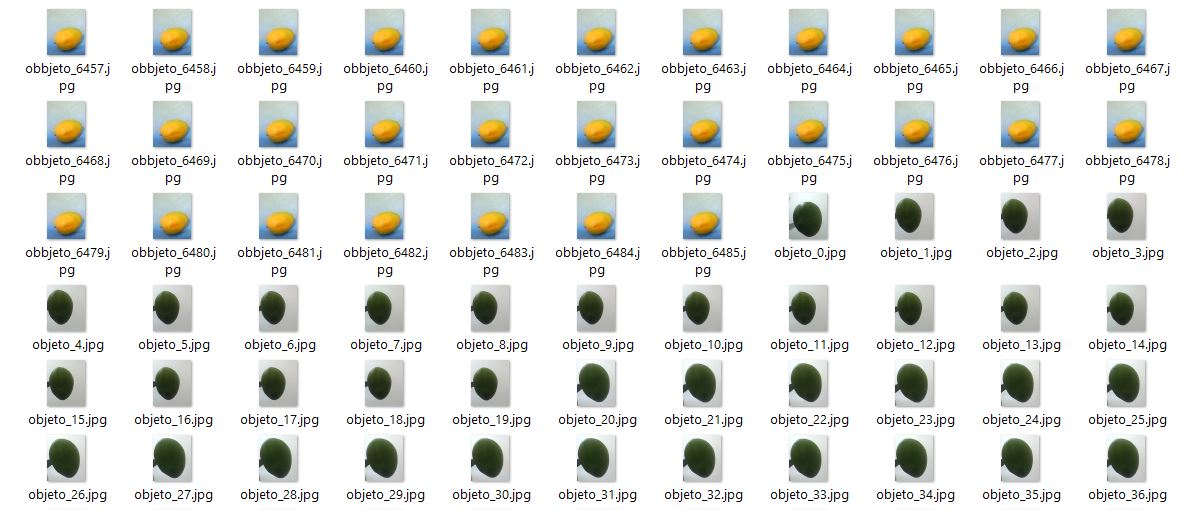

### Imagenes Mangos mal estado

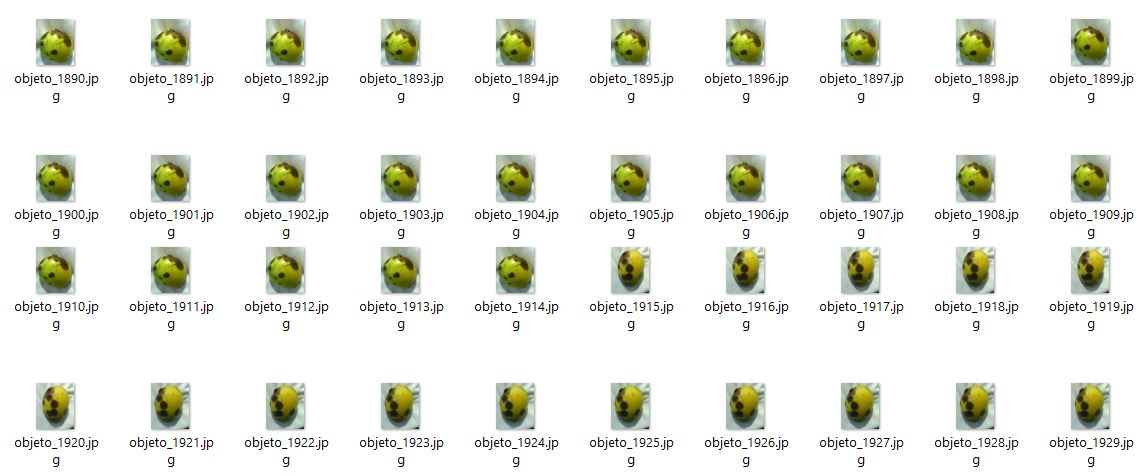

**Caracteristcas de una imagen del dataset del mango en buen estado verde**

A continuacion se escogera una imagen aleatoria del dataset, ya que todas presentan la misma resolucion y se le hara un estudio estadisitico 

- Dimensiones de la imagen:
(46, 38, 3)
- Tamaño de la imagen  en pixeles:
5244
- Media:
146.8567887109077
- Varianza:
4607.309963448111
- Mediana:
166.0
- Desviacion tipica:
67.8771682043978


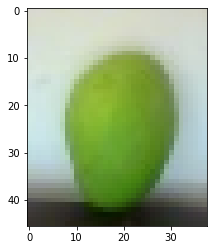

In [13]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
img  =  cv2.imread( "objeto_4.jpg" )
RGB_im = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)
print("- Dimensiones de la imagen:")
print(RGB_im.shape)

print("- Tamaño de la imagen  en pixeles:")
print(RGB_im.size)

print("- Media:")
print(RGB_im.mean())

print("- Varianza:")
print(np.var(RGB_im))

print("- Mediana:")
print(np.median(RGB_im))

print("- Desviacion tipica:")
print(np.std(RGB_im))


plt . imshow ( RGB_im )

plt . show ()

**Convertir la imagen a escala de grises (Blanco y Negro)**

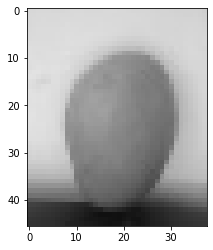

In [14]:
import cv2
from matplotlib import pyplot as plt
img  =  cv2.imread( "objeto_4.jpg" )
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
RGB_im = cv2.cvtColor (gray_img, cv2.COLOR_BGR2RGB)


plt . imshow ( RGB_im )

plt . show ()

**Histograma de la imagen de muestra**

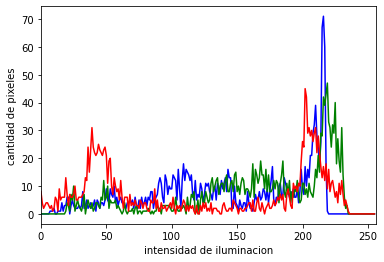

In [15]:
img = cv2.imread('objeto_4.jpg')
cv2.imshow('objeto_4.jpg', img)
RGB_im = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)
color = ('b','g','r')

for i, c in enumerate(color):
    hist = cv2.calcHist([RGB_im], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])


plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

cv2.destroyAllWindows()

**BORDES**

Se usa para encontrar los limites de los objetos dentro de las imagenes

* **Canny**


Primero se transformo la imagen BGR a escalas de grises, despues se aplico detección de bordes con cv2.Canny.

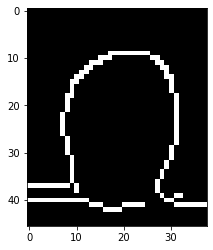

In [16]:
img = cv2.imread("objeto_4.jpg")
grises = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
bordes = cv2.Canny(grises, 100, 200)  

RGB_im = cv2.cvtColor (bordes, cv2.COLOR_BGR2RGB)

plt . imshow (RGB_im )

plt . show ()

#AMPLIADA EN UNA VENTANA
#cv2.imshow("Canny", RGB_im)
#cv2.waitKey(0)

**HISTOGARAMA IMAGEN GRIS**

El histograma nos ayuda a ver el comportamiento de la imagen, el nivel de intensidad está en el rango de 0 a 255, en donde el valor 0 representa los color negro y 255 el color blanco

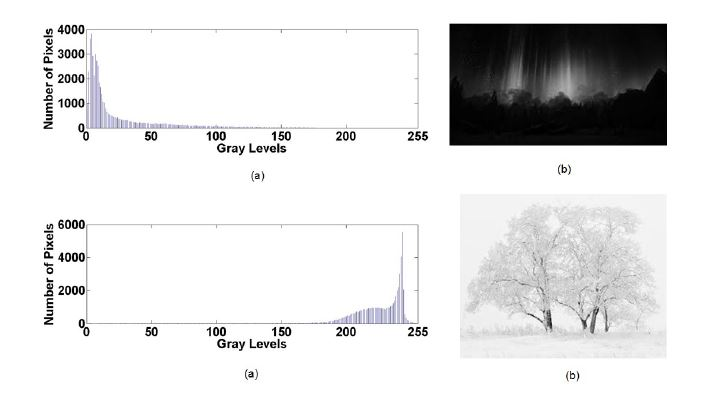

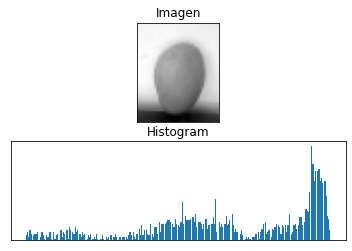

In [17]:
img = cv2.imread('mangoo.png',0)
plt.subplot(2,1,1), plt.imshow(img,cmap = 'gray')
plt.title('Imagen'), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2), plt.hist(img.ravel(), 256)
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
 
plt.show()

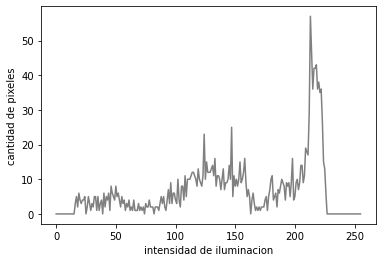

In [18]:
img = cv2.imread('mangoo.png', cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color='gray' )

plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

cv2.destroyAllWindows()

**Caracteristcas de una imagen del dataset del mango en buen estado amarillo**

- Dimensiones de la imagen:
(46, 38, 3)
- Tamaño de la imagen  en pixeles:
5244
- Media:
157.02517162471395
- Varianza:
2528.640098654755
- Mediana:
173.0
- Desviacion tipica:
50.285585396361405


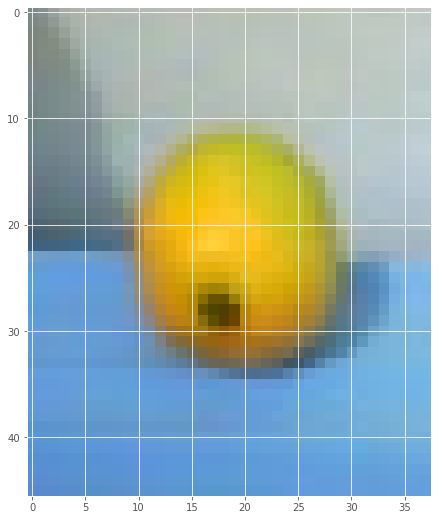

In [16]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
img  =  cv2.imread( "objeto_5.jpg" )
RGB_im = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)
print("- Dimensiones de la imagen:")
print(RGB_im.shape)

print("- Tamaño de la imagen  en pixeles:")
print(RGB_im.size)

print("- Media:")
print(RGB_im.mean())

print("- Varianza:")
print(np.var(RGB_im))

print("- Mediana:")
print(np.median(RGB_im))

print("- Desviacion tipica:")
print(np.std(RGB_im))


plt . imshow ( RGB_im )

plt . show ()

**Convertir la imagen a escala de grises (Blanco y Negro)**

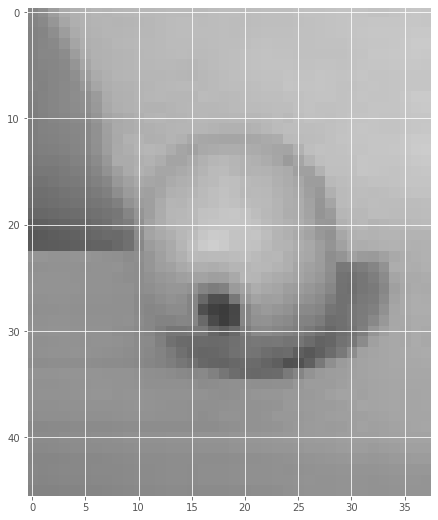

In [17]:
import cv2
from matplotlib import pyplot as plt
img  =  cv2.imread( "objeto_5.jpg" )
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
RGB_im = cv2.cvtColor (gray_img, cv2.COLOR_BGR2RGB)


plt . imshow ( RGB_im )

plt . show ()

**Histograma de la imagen de muestra**

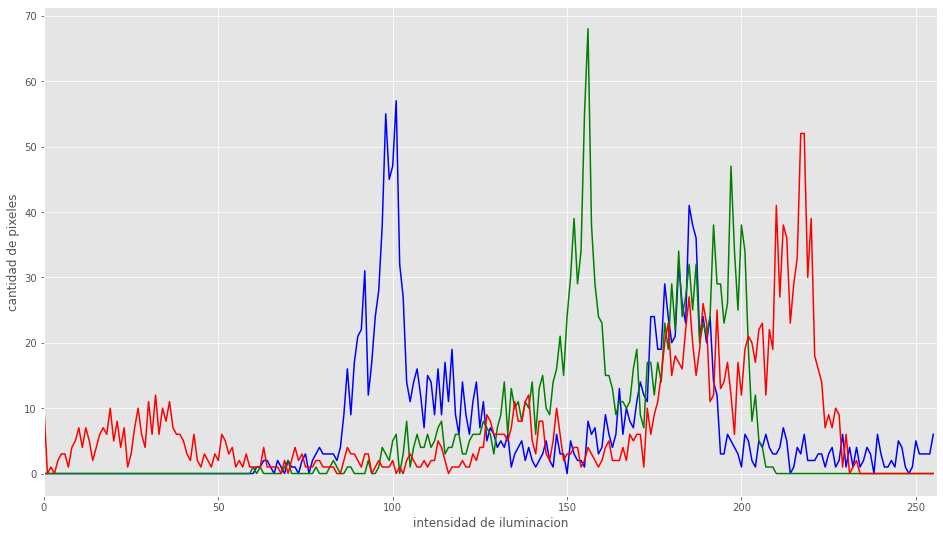

In [18]:
img = cv2.imread('objeto_5.jpg')
cv2.imshow('objeto_5.jpg', img)
RGB_im = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)
color = ('b','g','r')

for i, c in enumerate(color):
    hist = cv2.calcHist([RGB_im], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])


plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

cv2.destroyAllWindows()

**HISTOGARAMA IMAGEN GRIS**

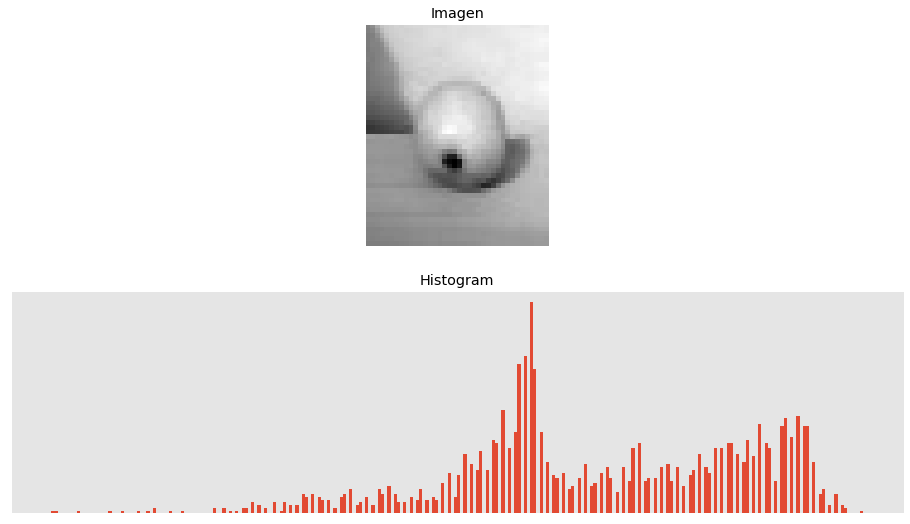

In [19]:
img = cv2.imread('objeto_5.jpg',0)
plt.subplot(2,1,1), plt.imshow(img,cmap = 'gray')
plt.title('Imagen'), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2), plt.hist(img.ravel(), 256)
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
 
plt.show()

**Caracteristcas de una imagen del dataset del mango en mal estado**

- Dimensiones de la imagen:
(46, 38, 3)
- Tamaño de la imagen  en pixeles:
5244
- Media:
126.2974828375286
- Varianza:
4243.386332336662
- Mediana:
148.0
- Desviacion tipica:
65.14127978737187


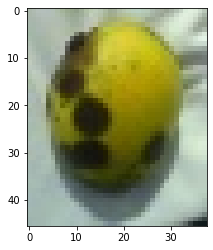

In [19]:


import cv2
import numpy as np 
from matplotlib import pyplot as plt
img  =  cv2.imread( "objeto_1929.jpg" )
RGB_im = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)
print("- Dimensiones de la imagen:")
print(RGB_im.shape)

print("- Tamaño de la imagen  en pixeles:")
print(RGB_im.size)

print("- Media:")
print(RGB_im.mean())

print("- Varianza:")
print(np.var(RGB_im))

print("- Mediana:")
print(np.median(RGB_im))

print("- Desviacion tipica:")
print(np.std(RGB_im))


plt . imshow ( RGB_im )

plt . show ()

**Convertir la imagen a escala de grises (Blanco y Negro)**

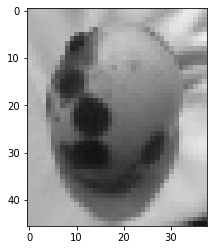

In [20]:
import cv2
from matplotlib import pyplot as plt
img  =  cv2.imread( "objeto_1929.jpg" )
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
RGB_im = cv2.cvtColor (gray_img, cv2.COLOR_BGR2RGB)


plt . imshow ( RGB_im )

plt . show ()

**Histograma de la imagen de muestra**

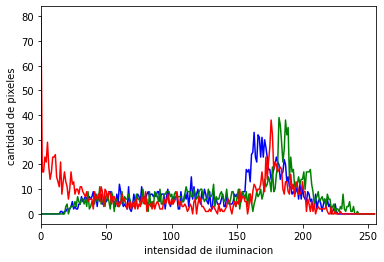

In [21]:
img = cv2.imread('objeto_1929.jpg')
cv2.imshow('objeto_1929.jpg', img)
RGB_im = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)
color = ('b','g','r')

for i, c in enumerate(color):
    hist = cv2.calcHist([RGB_im], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])


plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

cv2.destroyAllWindows()

**Histograma a escala de gris**

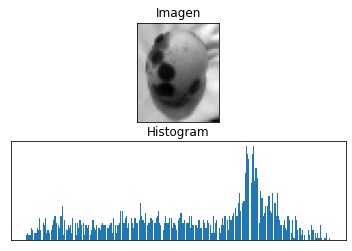

In [22]:
img = cv2.imread('objeto_1929.jpg',0)
plt.subplot(2,1,1), plt.imshow(img,cmap = 'gray')
plt.title('Imagen'), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2), plt.hist(img.ravel(), 256)
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
 
plt.show()

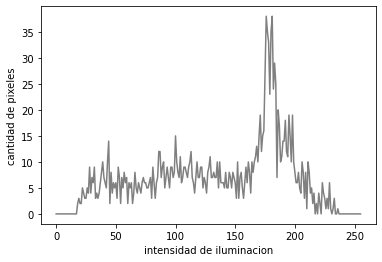

In [23]:
img = cv2.imread('objeto_1929.jpg', cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color='gray' )

plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

cv2.destroyAllWindows()

**Bordes**

* Canny

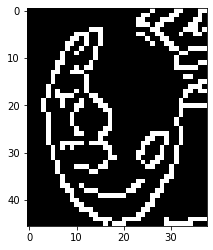

In [24]:
img = cv2.imread("objeto_1929.jpg")
grises = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
bordes = cv2.Canny(grises, 100, 200)  

RGB_im = cv2.cvtColor (bordes, cv2.COLOR_BGR2RGB)

plt . imshow (RGB_im )

plt . show ()

#AMPLIADA EN UNA VENTANA
#cv2.imshow("Canny", RGB_im)
#cv2.waitKey(0)

# ANOTACIONES PARA LAS DOS ETIQUETAS

### ETIQUETA DEL MANGO DE HILACHHA EN BUEN ESTADO

Se utilizarara la herramienta Labelimg de python, las etiquetas servirán para que nuestro clasificador se entrene mucho mejor, enfocando los puntos de interés y la descripción local, cabe decir que en una imagen puede haber uno o mas etiquetas, en el presente caso las anotaciones son para las etiquetas de buen estado del mango de hilacha y las de mal estado. En la siguiente grafica se analiza como se enfoca en el objetivo a clasificar:


**Labelimg**

LabelImg es una herramienta de anotación de imágenes gráficas, Las anotaciones se guardan como archivos XML en formato PASCAL VOC donde anotarás cada objeto, sus posiciones x,y su alto y ancho.

In [1]:
pip install labelImg


  Using cached labelImg-1.8.4.tar.gz (242 kB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\elkin\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\elkin\\AppData\\Local\\Temp\\pip-install-yskeaccg\\labelimg\\setup.py'"'"'; __file__='"'"'C:\\Users\\elkin\\AppData\\Local\\Temp\\pip-install-yskeaccg\\labelimg\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\elkin\AppData\Local\Temp\pip-pip-egg-info-c4lui8oh'
         cwd: C:\Users\elkin\AppData\Local\Temp\pip-install-yskeaccg\labelimg\
    Complete output (7 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\elkin\AppData\Local\Temp\pip-install-yskeaccg\labelimg\setup.py", line 20, in <module>
        readme = readme_file.read()
      File "C:\Users\elkin\anaconda3\lib\encodings\cp1252.py", line 23, in

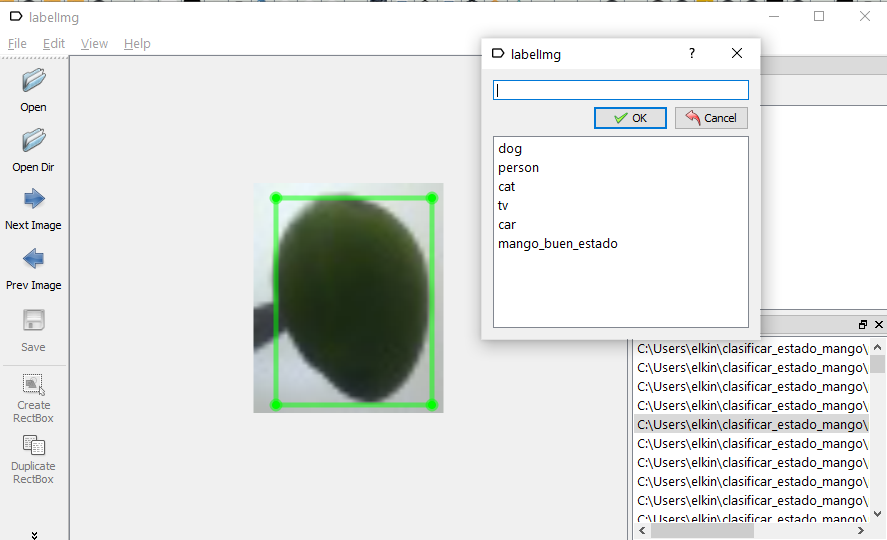

Respecto a las anotaciones y los puntos de interés que se van a analizar, se crea un archivo en formato de .txt donde muestra las características de la imagen a etiquetar, añadiendo los puntos de interés máximos y mínimos con su respectiva coordenada como se observa en la siguiente imagen:

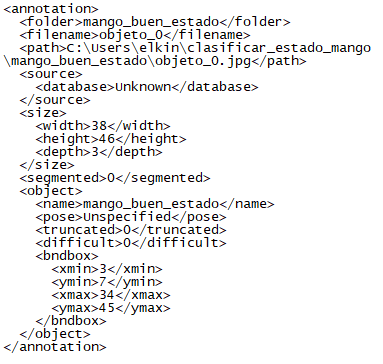

### ETIQUETA DEL MANGO DE HILACHHA EN MAL ESTADO

Se implementan los mismos procedimientos que se ejecutó en el estado de mango de hilacha en buen estado, en este caso enfocando los puntos de interés del mango en mal estado, observando que se van estudiar la enfermedad más importante que ataca al mango la cual se llama antracnosis, lo cual es la que produce mayores pérdidas en la postcosecha. En la fase inicial de la enfermedad produce disminución de la calidad debido a manchas negras sobre el fruto, sin embargo, cuando la enfermedad avanza, puede afectar la textura y el sabor de la pulpa, el principal detonante de la enfermedad antracnosis en la humedad ambiental.


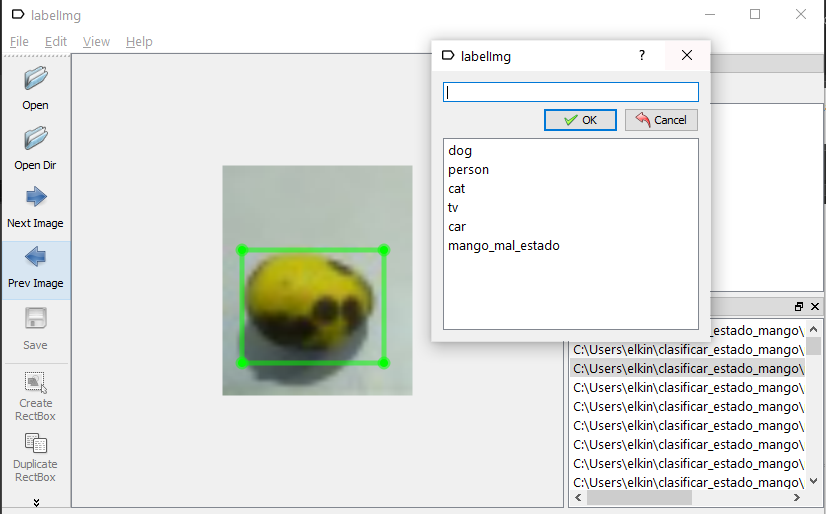

**CONVOLUTIONAL NEURAL NETWORKS (CNN)**

Las Redes neuronales convolucionales son  un tipo de redes neuronales artificiales  donde las “neuronas”  corresponden a campos receptivos de una manera muy similar a las neuronas en la corteza visual primaria (V1) de un cerebro biológico.  Este tipo de red es una variación de un perceptrón multicapa, sin embargo, debido a que su aplicación es realizada en matrices bidimensionales, son muy efectivas para tareas de visión artificial, como en la clasificación y segmentación de imágenes, entre otras aplicaciones.

El Aprendizaje Profundo es un método del Machine Learning que nos permite entrenar una Inteligencia Artificial para obtener una predicción dado un conjunto de entradas. Esta inteligencia logrará un nivel de cognición por jerarquías.

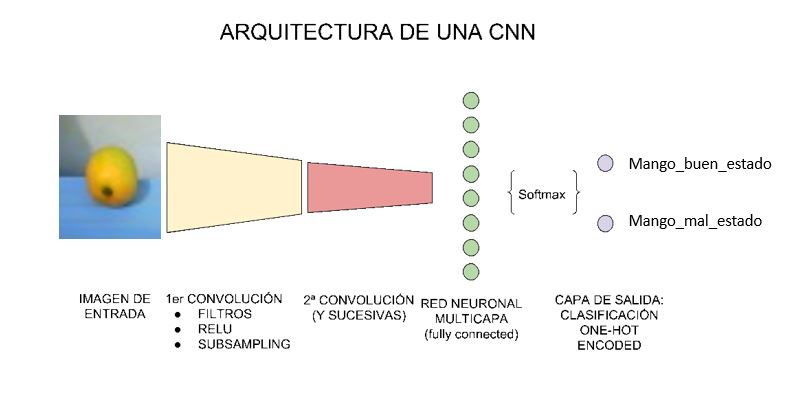

**Capa Convolucional**

Como redes de clasificación, al principio se encuentra la fase de extracción de características, compuesta de neuronas convolucionales y de reducción de muestreo.

Al final de la red se encuentran neuronas multicapa para realizar la clasificación final sobre las características extraídas. La fase de extracción de características se asemeja al proceso estimulante en las células de la corteza visual. 





**Capa pooling o sampling**

Esta capa se encarga de reducir las dimensiones del resultado obtenido de la capa convolucional para reducir el tiempo de procesamiento, es decir, una compresión de los datos. Al igual que antes, las neuronas de esta capa se conectan con un número limitado de neuronas de la capa previa que a su vez tienen un campo receptivo reducido. El algoritmo que se utilizo fue el max-pooling. 

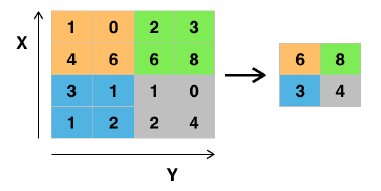

**Capa densa o fully-connected**

Esta capa se denomina densa ya que todos los nodos están conectados entre sí y su objetivo es realizar la clasificación de la imagen en base a los resultados de las capas anteriores implementando una red neuronal multicapa, la cual dará con resultado la clasificación al objetivo a identificar.


## Leer el Dataset

Primer paso, será el de leer las anotaciones xml que tenemos creadas en un directorio e ir iterando los objetos para contabilizar las etiquetas.

In [3]:
import xml.etree.ElementTree as ET
import os

xml_dir = "clasificar_estado_mango/mango_buen_estado/anotaciones/"     # directorio que contiene los xml
img_dir = "clasificar_estado_mango/mango_buen_estado/imagenes/"   # directorios con las imagenes
xml_dir = "clasificar_estado_mango/mango_mal_estado/anotaciones/"
img_dir = "clasificar_estado_mango/mango_mal_estado/imagenes/"
labels = ["mango_buen_estado" , "mango_mal_estado"]
tamanio = 416           # tamanio en pixeles para entrenar la red
mejores_pesos = "red_mango.h5"


def leer_annotations(ann_dir, img_dir, labels=[]):
    all_imgs = []
    seen_labels = {}
    
    for ann in [x for x in sorted(os.listdir(ann_dir)) if x.endswith('.xml')] :
        img = {'object':[]}
        
        tree = ET.parse(ann_dir + ann)
        
        for elem in tree.iter():
            if 'filename' in elem.tag:
                img['filename'] = img_dir + elem.text
            if 'width' in elem.tag:
                img['width'] = int(elem.text)
            if 'height' in elem.tag:
                img['height'] = int(elem.text)
            if 'object' in elem.tag or 'part' in elem.tag:
                obj = {}
                
                for attr in list(elem):
                    if 'name' in attr.tag:
                        obj['name'] = attr.text

                        if obj['name'] in seen_labels:
                            seen_labels[obj['name']] += 1
                        else:
                            seen_labels[obj['name']] = 1
                        
                        if len(labels) > 0 and obj['name'] not in labels:
                            break
                        else:
                            img['object'] += [obj]
                            
                    if 'bndbox' in attr.tag:
                        for dim in list(attr):
                            if 'xmin' in dim.tag:
                                obj['xmin'] = int(round(float(dim.text)))
                            if 'ymin' in dim.tag:
                                obj['ymin'] = int(round(float(dim.text)))
                            if 'xmax' in dim.tag:
                                obj['xmax'] = int(round(float(dim.text)))
                            if 'ymax' in dim.tag:
                                obj['ymax'] = int(round(float(dim.text)))

        if len(img['object']) > 0:
            all_imgs += [img]
                        
    return all_imgs, seen_labels


########################################################################



train_imgs, train_labels = leer_annotations(xml_dir, img_dir, labels)
print('imagenes',len(train_imgs), 'labels',len(train_labels))

imagenes 47 labels 1


## Train y Validación

Separaremos un 20% de las imágenes y anotaciones para testear el modelo. En este caso se utilizará el set de Validación al final de cada época para evaluar métricas, pero nunca se usará para entrenar.

In [4]:
import numpy as np 
train_valid_split = int(0.8*len(train_imgs))
np.random.shuffle(train_imgs)
valid_imgs = train_imgs[train_valid_split:]
train_imgs = train_imgs[:train_valid_split]
print('train:',len(train_imgs), 'validate:',len(valid_imgs))

train: 37 validate: 10




### Data Augmentation ###

El Data Augmentation sirve para agregar pequeñas alteraciones ó cambios a las imágenes de entradas aumentando virtualmente nuestro dataset de imágenes y mejorando la capacidad de la red para detectar objetos. Para hacerlo nos apoyamos sobre una librería llamada imgaug que nos brinda muchas funcionalidades como agregar desenfoque, agregar brillo, ó ruido aleatoriamente a las imágenes. 

In [19]:
from keras.utils import Sequence

def bbox_iou(box1, box2):
    intersect_w = _interval_overlap([box1.xmin, box1.xmax], [box2.xmin, box2.xmax])
    intersect_h = _interval_overlap([box1.ymin, box1.ymax], [box2.ymin, box2.ymax])  
    
    intersect = intersect_w * intersect_h

    w1, h1 = box1.xmax-box1.xmin, box1.ymax-box1.ymin
    w2, h2 = box2.xmax-box2.xmin, box2.ymax-box2.ymin
    
    union = w1*h1 + w2*h2 - intersect
    
    return float(intersect) / union

class BoundBox:
    def __init__(self, xmin, ymin, xmax, ymax, c = None, classes = None):
        self.xmin = xmin
        self.ymin = ymin
        self.xmax = xmax
        self.ymax = ymax
        
        self.c     = c
        self.classes = classes

        self.label = -1
        self.score = -1

    def get_label(self):
        if self.label == -1:
            self.label = np.argmax(self.classes)
        
        return self.label
    
    def get_score(self):
        if self.score == -1:
            self.score = self.classes[self.get_label()]
            
        return self.score


class BatchGenerator(Sequence):
    def __init__(self, images, 
                       config, 
                       shuffle=True, 
                       jitter=True, 
                       norm=None):
        self.generator = None

        self.images = images
        self.config = config

        self.shuffle = shuffle
        self.jitter  = jitter
        self.norm    = norm

        self.anchors = [BoundBox(0, 0, config['ANCHORS'][2*i], config['ANCHORS'][2*i+1]) for i in range(int(len(config['ANCHORS'])//2))]

        ### augmentors by https://github.com/aleju/imgaug
        sometimes = lambda aug: iaa.Sometimes(0.5, aug)

        self.aug_pipe = iaa.Sequential(
            [
                sometimes(iaa.Affine()),
                iaa.SomeOf((0, 5),
                    [
                        iaa.OneOf([
                            iaa.GaussianBlur((0, 3.0)), #desenfocar imágenes con un sigma entre 0 y 3,0
                            iaa.AverageBlur(k=(2, 7)), # difuminar la imagen usando medios locales con tamaños de kernel entre 2 y 7
                            iaa.MedianBlur(k=(3, 11)), # difuminar la imagen usando medianas locales con tamaños de kernel entre 2 y 7
                        ]),
                        iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # afilar imágenes
                        iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5), # agregar ruido gaussiano a 
                        #las imágenes
                        iaa.OneOf([
                            iaa.Dropout((0.01, 0.1), per_channel=0.5), #eliminar aleatoriamente hasta el 10% de los píxeles
                        ]),
                        iaa.Add((-10, 10), per_channel=0.5), # cambiar el brillo de las imágenes (de -10 a 10 del valor original)
                        iaa.Multiply((0.5, 1.5), per_channel=0.5), # cambiar el brillo de las imágenes (50-150% del valor 
                        #original)
                        iaa.ContrastNormalization((0.5, 2.0), per_channel=0.5), #mejorar el contraste
                    ],
                    random_order=True
                )
            ],
            random_order=True
        )

        if shuffle: np.random.shuffle(self.images)

    def __len__(self):
        return int(np.ceil(float(len(self.images))/self.config['BATCH_SIZE']))   

    def num_classes(self):
        return len(self.config['LABELS'])

    def size(self):
        return len(self.images)    

    def load_annotation(self, i):
        annots = []

        for obj in self.images[i]['object']:
            annot = [obj['xmin'], obj['ymin'], obj['xmax'], obj['ymax'], self.config['LABELS'].index(obj['name'])]
            annots += [annot]

        if len(annots) == 0: annots = [[]]

        return np.array(annots)

    def load_image(self, i):
        return cv2.imread(self.images[i]['filename'])

    def __getitem__(self, idx):
        l_bound = idx*self.config['BATCH_SIZE']
        r_bound = (idx+1)*self.config['BATCH_SIZE']

        if r_bound > len(self.images):
            r_bound = len(self.images)
            l_bound = r_bound - self.config['BATCH_SIZE']

        instance_count = 0

        x_batch = np.zeros((r_bound - l_bound, self.config['IMAGE_H'], self.config['IMAGE_W'], 3))       # imágenes de entrada
        b_batch = np.zeros((r_bound - l_bound, 1     , 1     , 1    ,  self.config['TRUE_BOX_BUFFER'], 4))   # lista de cajas GT self.config ['TRUE_self.config [' BOX '] _ BUFFER']
        y_batch = np.zeros((r_bound - l_bound, self.config['GRID_H'],  self.config['GRID_W'], self.config['BOX'], 4+1+len(self.config['LABELS'])))                # desired network output

        for train_instance in self.images[l_bound:r_bound]:
            # aumentar la imagen de entrada y corregir la posición y el tamaño del objeto
            img, all_objs = self.aug_image(train_instance, jitter=self.jitter)
            
            # construir la salida de los objetos x, y, w, h
            true_box_index = 0
            
            for obj in all_objs:
                if obj['xmax'] > obj['xmin'] and obj['ymax'] > obj['ymin'] and obj['name'] in self.config['LABELS']:
                    center_x = .5*(obj['xmin'] + obj['xmax'])
                    center_x = center_x / (float(self.config['IMAGE_W']) / self.config['GRID_W'])
                    center_y = .5*(obj['ymin'] + obj['ymax'])
                    center_y = center_y / (float(self.config['IMAGE_H']) / self.config['GRID_H'])

                    grid_x = int(np.floor(center_x))
                    grid_y = int(np.floor(center_y))

                    if grid_x < self.config['GRID_W'] and grid_y < self.config['GRID_H']:
                        obj_indx  = self.config['LABELS'].index(obj['name'])
                        
                        center_w = (obj['xmax'] - obj['xmin']) / (float(self.config['IMAGE_W']) / self.config['GRID_W']) # unit: grid cell
                        center_h = (obj['ymax'] - obj['ymin']) / (float(self.config['IMAGE_H']) / self.config['GRID_H']) # unit: grid cell
                        
                        box = [center_x, center_y, center_w, center_h]

                        # encuentra el ancla que mejor predice esta caja
                        best_anchor = -1
                        max_iou     = -1
                        
                        shifted_box = BoundBox(0, 
                                               0,
                                               center_w,                                                
                                               center_h)
                        
                        for i in range(len(self.anchors)):
                            anchor = self.anchors[i]
                            iou    = bbox_iou(shifted_box, anchor)
                            
                            if max_iou < iou:
                                best_anchor = i
                                max_iou     = iou
                                
                        #Asignar problemas de verdad x, y, w, h, confianza y clase a y_batch
                        y_batch[instance_count, grid_y, grid_x, best_anchor, 0:4] = box
                        y_batch[instance_count, grid_y, grid_x, best_anchor, 4  ] = 1.
                        y_batch[instance_count, grid_y, grid_x, best_anchor, 5+obj_indx] = 1
                        
                        # asignar el cuadro verdadero a b_batch
                        b_batch[instance_count, 0, 0, 0, true_box_index] = box
                        
                        true_box_index += 1
                        true_box_index = true_box_index % self.config['TRUE_BOX_BUFFER']
                            
            #asignar imagen de entrada a x_batch
            if self.norm != None: 
                x_batch[instance_count] = self.norm(img)
            else:
                # trazar la imagen y los cuadros delimitadores para comprobar la cordura
                for obj in all_objs:
                    if obj['xmax'] > obj['xmin'] and obj['ymax'] > obj['ymin']:
                        cv2.rectangle(img[:,:,::-1], (obj['xmin'],obj['ymin']), (obj['xmax'],obj['ymax']), (255,0,0), 3)
                        cv2.putText(img[:,:,::-1], obj['name'], 
                                    (obj['xmin']+2, obj['ymin']+12), 
                                    0, 1.2e-3 * img.shape[0], 
                                    (0,255,0), 2)
                        
                x_batch[instance_count] = img

            #aumentar el contador de instancias en el lote actual
            instance_count += 1  

        #print ('nuevo lote creado', idx)

        return [x_batch, b_batch], y_batch

    def on_epoch_end(self):
        if self.shuffle: np.random.shuffle(self.images)

    def aug_image(self, train_instance, jitter):
        image_name = train_instance['filename']
        image = cv2.imread(image_name)

        if image is None: print('Cannot find ', image_name)

        h, w, c = image.shape
        all_objs = copy.deepcopy(train_instance['object'])

        if jitter:
            ### escalar la imagen
            scale = np.random.uniform() / 10. + 1.
            image = cv2.resize(image, (0,0), fx = scale, fy = scale)

            ### traducir la imagen
            max_offx = (scale-1.) * w
            max_offy = (scale-1.) * h
            offx = int(np.random.uniform() * max_offx)
            offy = int(np.random.uniform() * max_offy)
            
            image = image[offy : (offy + h), offx : (offx + w)]

            ### voltear la imagen
            flip = np.random.binomial(1, .5)
            if flip > 0.5: image = cv2.flip(image, 1)
                
            image = self.aug_pipe.augment_image(image)            
            
        # cambiar el tamaño de la imagen a tamaño estándar
        image = cv2.resize(image, (self.config['IMAGE_H'], self.config['IMAGE_W']))
        image = image[:,:,::-1]

        # arreglar la posición y el tamaño del objeto
        for obj in all_objs:
            for attr in ['xmin', 'xmax']:
                if jitter: obj[attr] = int(obj[attr] * scale - offx)
                    
                obj[attr] = int(obj[attr] * float(self.config['IMAGE_W']) / w)
                obj[attr] = max(min(obj[attr], self.config['IMAGE_W']), 0)
                
            for attr in ['ymin', 'ymax']:
                if jitter: obj[attr] = int(obj[attr] * scale - offy)
                    
                obj[attr] = int(obj[attr] * float(self.config['IMAGE_H']) / h)
                obj[attr] = max(min(obj[attr], self.config['IMAGE_H']), 0)

            if jitter and flip > 0.5:
                xmin = obj['xmin']
                obj['xmin'] = self.config['IMAGE_W'] - obj['xmax']
                obj['xmax'] = self.config['IMAGE_W'] - xmin
                
        return image, all_objs

## Crear la Red de Clasificación

La red CNN está compuesta por 22 capas convolucionales que básicamente aplican BatchNormalizarion, MaxPooling y activación por LeakyRelu para la extracción de características, es decir, los patrones que encontrará en las imágenes (en sus pixeles) para poder diferenciar entre los objetos que queremos clasificar.

In [ ]:
from keras.models import Model
import tensorflow as tf
from keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.merge import concatenate
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard


FULL_YOLO_BACKEND_PATH  = "full_yolo_backend.h5"   
class BaseFeatureExtractor(object):
    """docstring for ClassName"""

    # to be defined in each subclass
    def __init__(self, input_size):
        raise NotImplementedError("error message")

    # to be defined in each subclass
    def normalize(self, image):
        raise NotImplementedError("error message")       

    def get_output_shape(self):
        return self.feature_extractor.get_output_shape_at(-1)[1:3]

    def extract(self, input_image):
        return self.feature_extractor(input_image)

class FullYoloFeature(BaseFeatureExtractor):
    """docstring for ClassName"""
    def __init__(self, input_size):
        input_image = Input(shape=(input_size, input_size, 3))

        
        return tf.space_to_depth(x, block_size=2)

        # capa 1
        x = Conv2D(32, (3,3), strides=(1,1), padding='same', name='conv_1', use_bias=False)(input_image)
        x = BatchNormalization(name='norm_1')(x)
        x = LeakyReLU(alpha=0.1)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)

        # capa 2
        x = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_2', use_bias=False)(x)
        x = BatchNormalization(name='norm_2')(x)
        x = LeakyReLU(alpha=0.1)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)

        # capa 3
        x = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_3', use_bias=False)(x)
        x = BatchNormalization(name='norm_3')(x)
        x = LeakyReLU(alpha=0.1)(x)

        # capa 4
        x = Conv2D(64, (1,1), strides=(1,1), padding='same', name='conv_4', use_bias=False)(x)
        x = BatchNormalization(name='norm_4')(x)
        x = LeakyReLU(alpha=0.1)(x)

        # capa 5
        x = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_5', use_bias=False)(x)
        x = BatchNormalization(name='norm_5')(x)
        x = LeakyReLU(alpha=0.1)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)

        # capa 6
        x = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_6', use_bias=False)(x)
        x = BatchNormalization(name='norm_6')(x)
        x = LeakyReLU(alpha=0.1)(x)

        # capa 7
        x = Conv2D(128, (1,1), strides=(1,1), padding='same', name='conv_7', use_bias=False)(x)
        x = BatchNormalization(name='norm_7')(x)
        x = LeakyReLU(alpha=0.1)(x)

        # capa 8
        x = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_8', use_bias=False)(x)
        x = BatchNormalization(name='norm_8')(x)
        x = LeakyReLU(alpha=0.1)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)

        # capa 9
        x = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_9', use_bias=False)(x)
        x = BatchNormalization(name='norm_9')(x)
        x = LeakyReLU(alpha=0.1)(x)

        # capa 10
        x = Conv2D(256, (1,1), strides=(1,1), padding='same', name='conv_10', use_bias=False)(x)
        x = BatchNormalization(name='norm_10')(x)
        x = LeakyReLU(alpha=0.1)(x)

        # capa 11
        x = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_11', use_bias=False)(x)
        x = BatchNormalization(name='norm_11')(x)
        x = LeakyReLU(alpha=0.1)(x)

        # capa 12
        x = Conv2D(256, (1,1), strides=(1,1), padding='same', name='conv_12', use_bias=False)(x)
        x = BatchNormalization(name='norm_12')(x)
        x = LeakyReLU(alpha=0.1)(x)

        # capa 13
        x = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_13', use_bias=False)(x)
        x = BatchNormalization(name='norm_13')(x)
        x = LeakyReLU(alpha=0.1)(x)

        skip_connection = x

        x = MaxPooling2D(pool_size=(2, 2))(x)

        # capa 14
        x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_14', use_bias=False)(x)
        x = BatchNormalization(name='norm_14')(x)
        x = LeakyReLU(alpha=0.1)(x)

        # capa 15
        x = Conv2D(512, (1,1), strides=(1,1), padding='same', name='conv_15', use_bias=False)(x)
        x = BatchNormalization(name='norm_15')(x)
        x = LeakyReLU(alpha=0.1)(x)

        # capa 16
        x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_16', use_bias=False)(x)
        x = BatchNormalization(name='norm_16')(x)
        x = LeakyReLU(alpha=0.1)(x)

        # capa 17
        x = Conv2D(512, (1,1), strides=(1,1), padding='same', name='conv_17', use_bias=False)(x)
        x = BatchNormalization(name='norm_17')(x)
        x = LeakyReLU(alpha=0.1)(x)

        # capa 18
        x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_18', use_bias=False)(x)
        x = BatchNormalization(name='norm_18')(x)
        x = LeakyReLU(alpha=0.1)(x)

        # capa 19
        x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_19', use_bias=False)(x)
        x = BatchNormalization(name='norm_19')(x)
        x = LeakyReLU(alpha=0.1)(x)

        # capa 20
        x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_20', use_bias=False)(x)
        x = BatchNormalization(name='norm_20')(x)
        x = LeakyReLU(alpha=0.1)(x)

        # capa 21
        skip_connection = Conv2D(64, (1,1), strides=(1,1), padding='same', name='conv_21', use_bias=False)(skip_connection)
        skip_connection = BatchNormalization(name='norm_21')(skip_connection)
        skip_connection = LeakyReLU(alpha=0.1)(skip_connection)
        skip_connection = Lambda(space_to_depth_x2)(skip_connection)

        x = concatenate([skip_connection, x])

        # capa 22
        x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_22', use_bias=False)(x)
        x = BatchNormalization(name='norm_22')(x)
        x = LeakyReLU(alpha=0.1)(x)

        self.feature_extractor = Model(input_image, x)
        self.feature_extractor.load_weights(FULL_YOLO_BACKEND_PATH)

    def normalize(self, image):
        return image / 255.
    
    # funciones que necesitaremos

def _sigmoid(x):
    return 1. / (1. + np.exp(-x))

def _softmax(x, axis=-1, t=-100.):         #  función exponencial normalizada
    x = x - np.max(x)
    
    if np.min(x) < t:
        x = x/np.min(x)*t
        
    e_x = np.exp(x)
    
    return e_x / e_x.sum(axis, keepdims=True)

def _interval_overlap(interval_a, interval_b):
    x1, x2 = interval_a
    x3, x4 = interval_b

    if x3 < x1:
        if x4 < x1:
            return 0
        else:
            return min(x2,x4) - x1
    else:
        if x2 < x3:
             return 0
        else:
            return min(x2,x4) - x3 
         ### escalar la imagen
            scale = np.random.uniform() / 10. + 1.
            image = cv2.resize(image, (0,0), fx = scale, fy = scale)

            ### traducir la imagen
            max_offx = (scale-1.) * w
            max_offy = (scale-1.) * h
            offx = int(np.random.uniform() * max_offx)
            offy = int(np.random.uniform() * max_offy)
            
            image = image[offy : (offy + h), offx : (offx + w)]

            ### voltear la imagen
            flip = np.random.binomial(1, .5)
            if flip > 0.5: image = cv2.flip(image, 1)
                
            image = self.aug_pipe.augment_image(image)            
            
        #cambiar el tamaño de la imagen a tamaño estándar
        image = cv2.resize(image, (self.config['IMAGE_H'], self.config['IMAGE_W']))
        image = image[:,:,::-1]

        #arreglar la posición y el tamaño del objeto
        for obj in all_objs:
            for attr in ['xmin', 'xmax']:
                if jitter: obj[attr] = int(obj[attr] * scale - offx)
                    
                obj[attr] = int(obj[attr] * float(self.config['IMAGE_W']) / w)
                obj[attr] = max(min(obj[attr], self.config['IMAGE_W']), 0)
                
            for attr in ['ymin', 'ymax']:
                if jitter: obj[attr] = int(obj[attr] * scale - offy)
                    
                obj[attr] = int(obj[attr] * float(self.config['IMAGE_H']) / h)
                obj[attr] = max(min(obj[attr], self.config['IMAGE_H']), 0)

            if jitter and flip > 0.5:
                xmin = obj['xmin']
                obj['xmin'] = self.config['IMAGE_W'] - obj['xmax']
                obj['xmax'] = self.config['IMAGE_W'] - xmin
                
        return image, all_objs

## Crear la Red de Detección y crear anclas

Esta red, utilizará la anterior (clasificación) y utilizará las features obtenidas en sus capas convolucionales de salida para hacer la detección de los objetos, es decir las posiciones x e y, alto y ancho. Para ello se valdrá de unas Anclas, en nuestro caso serán 5. Las Anclas son unas “ventanas”, o unas bounding boxes de distintos tamaños, pequeños, mediano grande, rectangulares o cuadrados que servirán para hacer “propuestas de detección”.

In [ ]:
mport random

num_anchors = 5

def IOU(ann, centroids):
    w, h = ann
    similarities = []

    for centroid in centroids:
        c_w, c_h = centroid

        if c_w >= w and c_h >= h:
            similarity = w*h/(c_w*c_h)
        elif c_w >= w and c_h <= h:
            similarity = w*c_h/(w*h + (c_w-w)*c_h)
        elif c_w <= w and c_h >= h:
            similarity = c_w*h/(w*h + c_w*(c_h-h))
        else: #Significa que ambos w, h son más grandes que c_w y c_h respectivamente
            similarity = (c_w*c_h)/(w*h)
        similarities.append(similarity) # se convertirá en (k,) forma

    return np.array(similarities)

def avg_IOU(anns, centroids):
    n,d = anns.shape
    sum = 0.

    for i in range(anns.shape[0]):
        sum+= max(IOU(anns[i], centroids))

    return sum/n

def print_anchors(centroids):
    anchors = centroids.copy()

    widths = anchors[:, 0]
    sorted_indices = np.argsort(widths)

    r = "anchors: ["
    for i in sorted_indices[:-1]:
        r += '%0.2f,%0.2f, ' % (anchors[i,0], anchors[i,1])

    
    r += '%0.2f,%0.2f' % (anchors[sorted_indices[-1:],0], anchors[sorted_indices[-1:],1])
    r += "]"

    print(r)

def run_kmeans(ann_dims, anchor_num):
    ann_num = ann_dims.shape[0]
    iterations = 0
    prev_assignments = np.ones(ann_num)*(-1)
    iteration = 0
    old_distances = np.zeros((ann_num, anchor_num))

    indices = [random.randrange(ann_dims.shape[0]) for i in range(anchor_num)]
    centroids = ann_dims[indices]
    anchor_dim = ann_dims.shape[1]

    while True:
        distances = []
        iteration += 1
        for i in range(ann_num):
            d = 1 - IOU(ann_dims[i], centroids)
            distances.append(d)
        distances = np.array(distances) 

        print("iteration {}: dists = {}".format(iteration, np.sum(np.abs(old_distances-distances))))

        #asignar muestras a centroides
        assignments = np.argmin(distances,axis=1)

        if (assignments == prev_assignments).all() :
            return centroids

        #calcular nuevos centroides
        centroid_sums=np.zeros((anchor_num, anchor_dim), np.float)
        for i in range(ann_num):
            centroid_sums[assignments[i]]+=ann_dims[i]
        for j in range(anchor_num):
            centroids[j] = centroid_sums[j]/(np.sum(assignments==j) + 1e-6)

        prev_assignments = assignments.copy()
        old_distances = distances.copy()

grid_w = tamanio/32
grid_h = tamanio/32

# ejecutar k_mean para encontrar las anclas
annotation_dims = []
for image in train_imgs:
    cell_w = image['width']/grid_w
    cell_h = image['height']/grid_h

    for obj in image['object']:
        relative_w = (float(obj['xmax']) - float(obj['xmin']))/cell_w
        relatice_h = (float(obj["ymax"]) - float(obj['ymin']))/cell_h
        annotation_dims.append(tuple(map(float, (relative_w,relatice_h))))

annotation_dims = np.array(annotation_dims)
centroids = run_kmeans(annotation_dims, num_anchors)

# escribir anclas en el archivo
print('\naverage IOU for', num_anchors, 'anchors:', '%0.2f' % avg_IOU(annotation_dims, centroids))
print_anchors(centroids)


mejores_pesos = "red_mango.h5"

image_path = "images/test/mango_buen_estado.png"
image_path2 = "images/test/mango_mal_estado.png"

mi_yolo = YOLO(input_size          = tamanio, 
            labels              = labels, 
            max_box_per_image   = 5,
            anchors             = anchors)

mi_yolo.load_weights(mejores_pesos)

image = cv2.imread(image_path)
boxes = mi_yolo.predict(image)
image = draw_boxes(image, boxes, labels)

print('Detectados', len(boxes))

cv2.imwrite(image_path[:-4] + '_detected' + image_path[-4:], image)

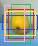

## ENTRENAMIENTO DEL CLASIFICADOR

In [ ]:
import cv2
cap = cv2.VideoCapture(0,cv2.CAP_DSHOW)
majinBooClassif = cv2.CascadeClassifier('cascade.xml')
while True:
    
    ret,frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    toy = majinBooClassif.detectMultiScale(gray,
    scaleFactor = 5,
    minNeighbors = 91,
    minSize=(70,78))
    for (x,y,w,h) in toy:
        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),2)
        cv2.putText(frame,'Mango_buen_estado',(x,y-10),2,0.7,(0,0,0),2,cv2.LINE_AA)
    cv2.imshow('Camara',frame)
    
    if cv2.waitKey(1) == 27:
        break
cap.release()
cv2.destroyAllWindows()

**Resultado**

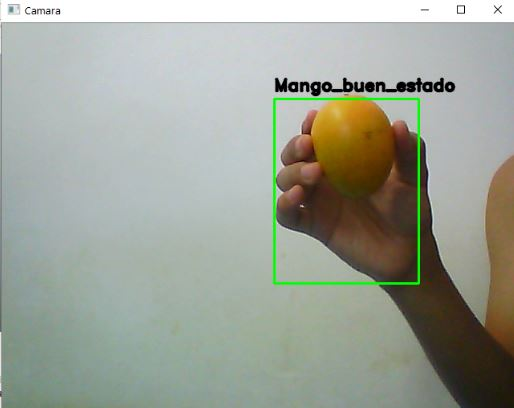

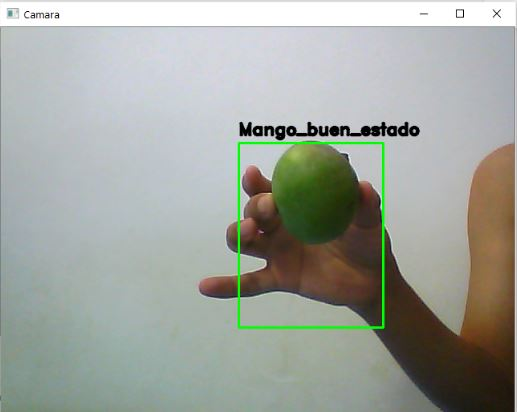

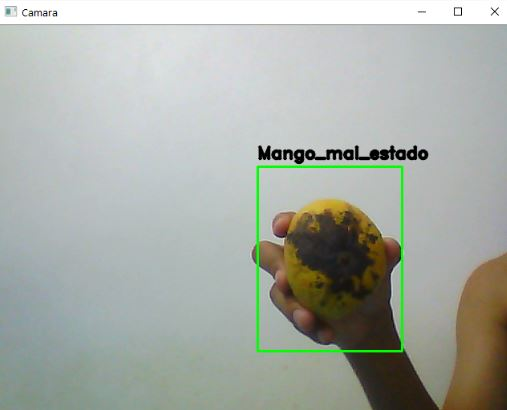

**REGRESION LOGISTICA**

Una regresión lineal es un modelo estadístico que analiza la relación entre una variable de respuesta (a menudo llamada y) y una o más variables y sus interacciones (a menudo llamadas x o variables explicativas). 

Se construira el modelo de predicción de clasificacion del estado de madures del mango de hilacha. Lo primero es cargar el conjunto de datos que esta su respectiva ubicacion, requerido usando la función de lectura EXCEL de los pandas.

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
dataframe = pd.read_excel(r"C:\Users\elkin\Desktop\ELHINMANGOS.xlsx")
dataframe.head(20)

,id,Meses,Manchas,Color,Estado
0,objeto2,1,4,Verded,bueno
1,objeto3,2,5,Amarillo,mal
2,objeto4,4,3,Verded,mal
3,objeto5,5,6,Verded,mal
4,objeto6,6,7,Amarillo,bueno
5,objeto7,4,9,Verded,mal
6,objeto8,1,3,Amarillo,mal
7,objeto9,2,2,Verded,mal
8,objeto10,5,1,Amarillo,bueno
9,objeto11,3,4,Verded,bueno


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       999 non-null    object
 1   Meses    999 non-null    int64 
 2   Manchas  999 non-null    int64 
 3   Color    999 non-null    object
 4   Estado   999 non-null    object
dtypes: int64(2), object(3)
memory usage: 39.1+ KB


In [4]:
dataframe.isnull().any()

id         False
Meses      False
Manchas    False
Color      False
Estado     False
dtype: bool

In [5]:
dataframe.describe()

,Meses,Manchas
count,999.000000,999.000000
mean,4.638639,3.050050
std,2.725694,1.460055
min,1.000000,1.000000
25%,2.000000,2.000000
50%,4.000000,3.000000
75%,7.000000,4.000000
max,10.000000,9.000000


Lo primero que se hizo fue asignarle a la columna Color los valores respecto a los dos tipos que son: 1 para color verde y 0 para el color amarillos, el mismo procedimiento se hizo para la columna Estado donde 1 hace referencia al estado bueno y 0 al estado malo.

In [6]:
dataframe['Color'] = dataframe['Color'].map({'Verded':1,'Amarillo':0})
dataframe['Estado'] = dataframe['Estado'].map({'bueno':1,'mal':0})

In [7]:
bins=[0,5 ,10]
names = ["0","1"]
dataframe['Meses'] = pd.cut(dataframe['Meses'], bins, labels =names)

bins=[0,5 ,9]
names = ["0","1"]
dataframe['Manchas'] = pd.cut(dataframe['Manchas'], bins, labels =names)

In [8]:
dataframe.head(50)

,id,Meses,Manchas,Color,Estado
0,objeto2,0,0,1,1
1,objeto3,0,0,0,0
2,objeto4,0,0,1,0
3,objeto5,0,1,1,0
4,objeto6,1,1,0,1
5,objeto7,0,1,1,0
6,objeto8,0,0,0,0
7,objeto9,0,0,1,0
8,objeto10,0,0,0,1
9,objeto11,0,0,1,1


In [9]:
dataframe.describe()

,Meses,Manchas,Color,Estado
count,999.000000,999.000000,999.000000,999.000000
mean,4.638639,3.050050,0.563564,0.497497
std,2.725694,1.460055,0.496192,0.500244
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000
50%,4.000000,3.000000,1.000000,0.000000
75%,7.000000,4.000000,1.000000,1.000000
max,10.000000,9.000000,1.000000,1.000000


Se filtra los datos estadisticos como la cantidad, media, desvío estándar, valores máximo y mínimo.

In [10]:
dataframe.cov()


,Meses,Manchas,Color,Estado
Meses,7.429407,0.199467,-0.143841,-0.144693
Manchas,0.199467,2.131761,-0.010199,0.005135
Color,-0.143841,-0.010199,0.246206,0.157223
Estado,-0.144693,0.005135,0.157223,0.250244


In [11]:
dataframe.corr(method="pearson")

,Meses,Manchas,Color,Estado
Meses,1.000000,0.050122,-0.106355,-0.106118
Manchas,0.050122,1.000000,-0.014077,0.007031
Color,-0.106355,-0.014077,1.000000,0.633411
Estado,-0.106118,0.007031,0.633411,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

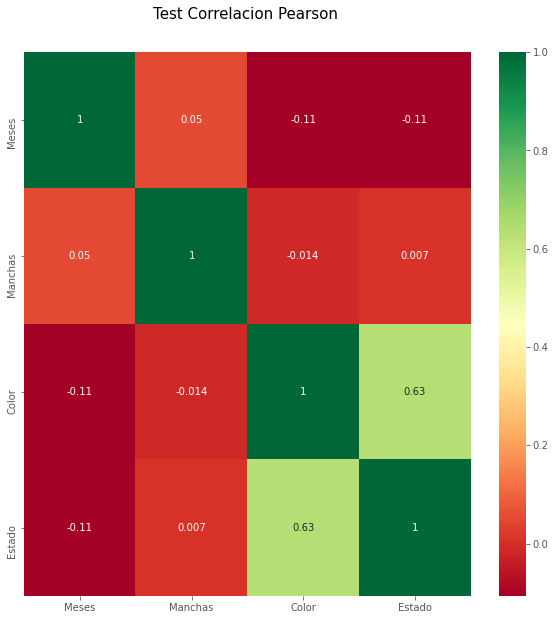

In [12]:
import seaborn as sns
sns.heatmap(dataframe.corr(method="pearson"),annot=True,cmap='RdYlGn') 
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Test Correlacion Pearson ', y=1.05, size=15)
plt.show

In [13]:
print(dataframe.groupby('Estado').size())

Estado
0    502
1    497
dtype: int64


In [14]:
print(dataframe.groupby('Color').size())

Color
0    436
1    563
dtype: int64


* Ahora vamos a proceder a definir las variables de “X” y “y” que vamos emplear en nuestro modelo.

Para “X” vamos a utilizar todas las variables que se encuentran dentro de “Meses”, “Manchas”, “Color”  por lo que la igualamos a dataset punto data.

Por su parte, “y” será igual a los datos correspondientes a “Estado” por lo que igualamos esta variable a dataset punto target.


In [15]:
X = dataframe[['Meses','Manchas','Color']].values
y = dataframe['Estado'].values

Recuerda que “y” cuenta con una sola columna con solamente ceros y unos, los unos indican que el mango esta en buen estado  mientras que los ceros corresponden al mango en mal estado

* Para la separación de los datos, vamos a tomar un 20% de los mismos para utilizarlos como prueba una vez que hayamos obtenido el modelo.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

* El siguiente paso que realizaremos es escalar los datos, esto se hace ya que las características son completamente distintas en magnitudes, unidades y rango por lo que lo mejor es escalarlos para llevarlos a un mismo nivel de magnitudes.

In [17]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()

* Para nuestro caso los datos a escalar son lo que tenemos dentro de las variables “X” tanto de entrenamiento como de prueba.

Ahora para realizar el escalamiento utilizaremos fit_transform, esta instrucción realiza el calculo respectivo y a su vez transforma y devuelve los datos ya escalados.

In [18]:
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

Ya en este momento tenemos nuestros datos listos para empezar a construir el modelo.

* Seguidamente entrenamos el modelo utilizando la instrucción fit y los datos tanto de “X” como de “y” de entrenamiento.

In [19]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [20]:
algoritmo.fit(X_train, y_train)

LogisticRegression()

Y finalmente realizamos una predicción, utilizando la instrucción predict y los datos de prueba.

In [21]:
y_pred = algoritmo.predict(X_test)

In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,0,1
4,1,1
...,...,...
195,1,1
196,1,1
197,1,1
198,1,1


Si comparamos los datos que predecimos con los datos reales podemos ver que nuestro modelo realizo un buen trabajo ya que a simple vista podemos observar que los datos predichos son similares a los datos reales.

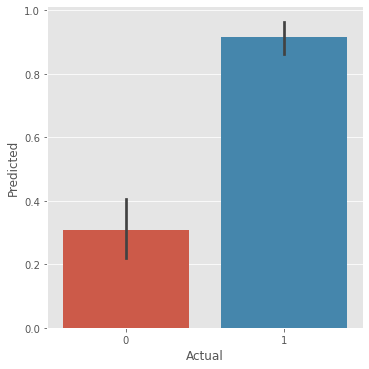

In [23]:
sns.catplot(x = "Actual", y = "Predicted", kind = "bar", data = df); 

Pero veamos si esto es cierto, para ello calculamos las métricas respectivas para verificar el rendimiento del modelo. Para esto debemos primero obtener **la matriz de confusión.**

## Matriz de confusión
Es una herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real. Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está confundiendo dos clases.




In [24]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[ 63  28]
 [  9 100]]


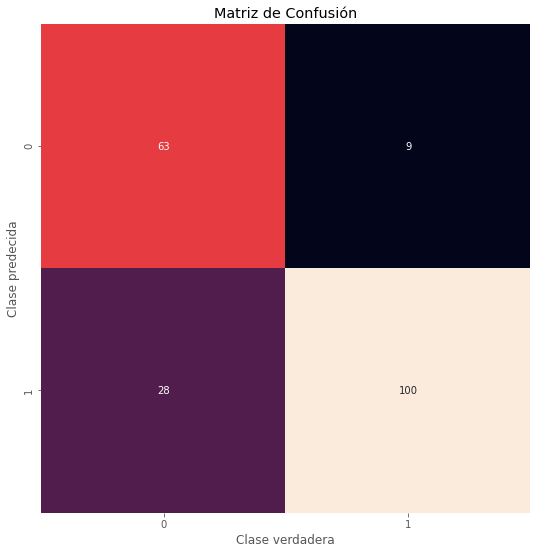

In [30]:
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase verdadera')
plt.ylabel('Clase predecida')
plt.title('Matriz de Confusión')
plt.show()

* La matriz nos indica que cuenta con 100 datos verdaderos positivos, es decir datos que en los datos reales eran 1 y el modelo los predijo correctamente.

* Por su parte son 63 los datos verdaderos negativos, esto quiere decir datos reales que eran 0 y el modelo los predijo como tal.

* Veamos ahora la cantidad de datos que el modelo no predijo correctamente. Comencemos con los datos falsos negativos, en total fueron 9, esto quiere decir datos reales que eran 1 pero el modelo los predijo como 0.

* En cuanto a los datos falsos positivos fueron 28 dato, que era en realidad 0 y el modelo lo predijo como 1.

**Calcular todas las métricas**

In [31]:
cnf_matrix = confusion_matrix(y_test, y_pred)

print("Cantidad de errores de clasificación sobre un total de {0} casos: {1}"
      .format(y_test.shape[0],(y_test != y_pred).sum()))
print("Efectividad del algoritmo: {0: .2f}"
      .format(1 - (y_test != y_pred).sum()/y_test.shape[0]))

Cantidad de errores de clasificación sobre un total de 200 casos: 37
Efectividad del algoritmo:  0.81


In [32]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.78125


In [33]:
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.815


In [34]:
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.9174311926605505


Calculemos ahora el puntaje F1 que es una combinación entre la precisión y la sensibilidad.

In [35]:
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.8438818565400844


In [36]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Curva ROC - AUC del modelo:
0.8048694424841214


In [37]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

In [38]:
model = LogisticRegression()  
model.fit(X_train, y_train)  

LogisticRegression()

In [39]:
probs = model.predict_proba(X_test) 

In [40]:
probs = probs[:, 1]  

In [41]:
auc = roc_auc_score(y_test, y_pred)  
print('AUC: %.2f' % auc)  

AUC: 0.80


In [42]:
fpr, tpr, thresholds = roc_curve(y_test, probs)  

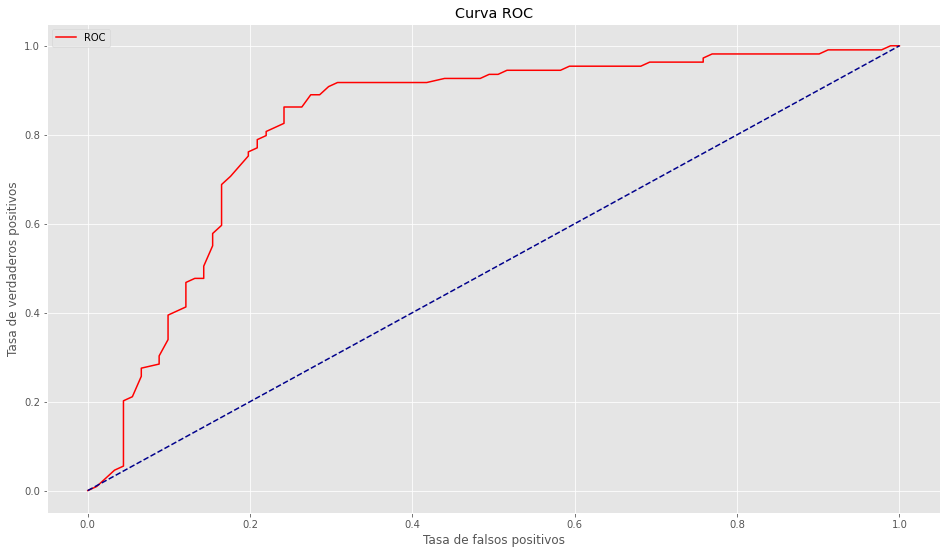

In [43]:
plot_roc_curve(fpr, tpr)

Una curva ROC (curva de característica operativa del recepto) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros: Tasa de verdaderos positivos. Tasa de falsos positivos.